Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
num_days_R_prediction=63

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=36 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
236                           NaN                Thailand  15.870032   
237                           NaN             Timor-Leste  -8.874217   
238                           NaN                    Togo   8.619500   
239                           NaN     Trinidad and Tobago  10.691800   
240                           NaN                 Tunisia  33.886917   
241                           NaN                  Turkey  38.963700   
242                           NaN           United States  40.000000   
243                           NaN                  Uganda   1.373333   
244                           NaN                 Ukraine  48.379400   
245                           NaN    United Arab Emirates  23.424076   
246                      Anguilla          United Kingdom  18.220600   
247                       Bermuda          United Kingdom  32.307800   
248        British Virgin Islands          United Kingdom  18.420700   
249                Cayman Islands          United Kingdom  19.313300   
250               Channel Islands          United Kingdom  49.372300   
251   Falkland Islands (Malvinas)          United Kingdom -51.796300   
252                     Gibraltar          United Kingdom  36.140800   
253                   Isle of Man          United Kingdom  54.236100   
254                    Montserrat          United Kingdom  16.742498   
255      Turks and Caicos Islands          United Kingdom  21.694000   
256                           NaN          United Kingdom  55.378100   
257                           NaN                 Uruguay -32.522800   
258                           NaN              Uzbekistan  41.377491   
259                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
238                           NaN                Thailand  15.870032   
239                           NaN             Timor-Leste  -8.874217   
240                           NaN                    Togo   8.619500   
241                           NaN     Trinidad and Tobago  10.691800   
242                           NaN                 Tunisia  33.886917   
243                           NaN                  Turkey  38.963700   
244                           NaN           United States  40.000000   
245                           NaN                  Uganda   1.373333   
246                           NaN                 Ukraine  48.379400   
247                           NaN    United Arab Emirates  23.424076   
248                      Anguilla          United Kingdom  18.220600   
249                       Bermuda          United Kingdom  32.307800   
250        British Virgin Islands          United Kingdom  18.420700   
251                Cayman Islands          United Kingdom  19.313300   
252               Channel Islands          United Kingdom  49.372300   
253   Falkland Islands (Malvinas)          United Kingdom -51.796300   
254                     Gibraltar          United Kingdom  36.140800   
255                   Isle of Man          United Kingdom  54.236100   
256                    Montserrat          United Kingdom  16.742498   
257      Turks and Caicos Islands          United Kingdom  21.694000   
258                           NaN          United Kingdom  55.378100   
259                           NaN                 Uruguay -32.522800   
260                           NaN              Uzbekistan  41.377491   
261                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/11/20  \
185        0        0        0        0        0        0  ...       17   
186        0        0        0        0        0        0  ...       19   
187        0        0        0        0        0        0  ...       83   
188        0        0        0        0        0        0  ...        3   
189        0        0        0        0        0        0  ...        0   
190        0        0        0        0        0        0  ...        1   
191        0        0        0        0        0        0  ...       17   
192        0        0        0        0        0        0  ...     6141   
193        0        0        0        0        0        0  ...       22   
194        0        0        0        0        0        0  ...      128   

     8/12/20  8/13/20  8/14/20  8/15/20  8/16/20  8/17/20  8/18/20  \
185       19       19       19       19       19       19       19   
186       22       27       31       35       35       36       37   
187       91       95       99      102      104      107      114   
188        3        4        4        4        4        4        4   
189        0        0        0        0        0        0        0   
190        1        1        1        1        1        1        1   
191       17       17       17       17       17       17       17   
192     6161     6165     6167     6169     6172     6172     6175   
193       22       22       22       22       22       22       22   
194      128      128      128      128      128      128      133   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 216 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/11/20  \
175        0        0        0        0        0        0  ...      114   
176        0        0        0        0        0        0  ...        7   
177        0        0        0        0        0        0  ...       30   
178        0        0        0        0        0        0  ...       93   
179        0        0        0        0        0        0  ...        0   
180        0        0        0        0        0        0  ...     1526   
181        0        0        0        0        0        0  ...     2913   
182        0        0        0        0        0        0  ...     1065   
183        0        0        0        0        0        0  ...    33609   
184        0        0        0        0        0        0  ...     8248   

     8/12/20  8/13/20  8/14/20  8/15/20  8/16/20  8/17/20  8/18/20  \
175      114      114      114      193      200      212      277   
176        7        7        7        7        7        7        7   
177       30       30       30       31       31       31       31   
178      102      102      102      107      107      107      107   
179        0        0        0        0        0        0        0   
180     1531     1531     1531     1531     1531     1531     1531   
181     2913     2913     2913     2913     2913     2913     2913   
182     1075     1075     1075     1077     1078     1078     1079   
183    33943    34309    35998    36290    36497    36834    37051   
184     8487     8662     9030     9123     9174     9174     9513   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 216 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/11/20  \
185        0        0        0        0        0        0  ...     2481   
186        0        0        0        0        0        0  ...     3229   
187        0        0        0        1        1        1  ...    23948   
188        0        0        0        0        0        0  ...      717   
189        0        0        0        0        0        0  ...       13   
190        0        0        0        0        0        0  ...       32   
191        0        0        0        0        0        0  ...      205   
192        0        0        0        0        0        0  ...    59424   
193        0        0        0        0        0        0  ...     1570   
194        0        0        0        0        0        0  ...     4115   

     8/12/20  8/13/20  8/14/20  8/15/20  8/16/20  8/17/20  8/18/20  \
185     2559     2638     2708     2791     2855     2914     2991   
186     3406     3544     3726     3907     4154     4344     4464   
187    24432    24957    25551    26019    26660    27241    28257   
188      798      894      973     1048     1102     1121     1205   
189       13       13       13       13       13       13       13   
190       32       32       32       33       34       36       36   
191      248      263      269      300      317      326      333   
192    60627    61204    61840    62495    63002    63484    63973   
193     1589     1602     1609     1622     1631     1643     1649   
194     4115     4115     4115     4115     4115     4115     4311   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 216 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN     Seychelles  -4.679600   55.492000        0        0   
221            NaN   Sierra Leone   8.460555  -11.779889        0        0   
222            NaN      Singapore   1.283300  103.833300        0        1   
223            NaN       Slovakia  48.669000   19.699000        0        0   
224            NaN       Slovenia  46.151200   14.995500        0        0   
225            NaN        Somalia   5.152149   46.199616        0        0   
226            NaN   South Africa -30.559500   22.937500        0        0   
227            NaN    South Sudan   6.877000   31.307000        0        0   
228            NaN          Spain  40.463667   -3.749220        0        0   
229            NaN      Sri Lanka   7.873054   80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  8/11/20  8/12/20  8/13/20  \
220        0        0        0        0  ...      127      127      127   
221        0        0        0        0  ...     1932     1937     1940   
222        3        3        4        5  ...    55353    55395    55497   
223        0        0        0        0  ...     2615     2690     2739   
224        0        0        0        0  ...     2272     2303     2332   
225        0        0        0        0  ...     3227     3227     3227   
226        0        0        0        0  ...   566109   568919   572865   
227        0        0        0        0  ...     2472     2477     2478   
228        0        0        0        0  ...   326612   329784   337334   
229        0        0        0        1  ...     2880     2881     2882   

     8/14/20  8/15/20  8/16/20  8/17/20  8/18/20   Population   \
220      127      127      127      127      127           NaN   
221     1947     1954     1956     1956     1959           NaN   
222    55580    55661    55747    55838    55938     5,612,000   
223     2801     2855     2902     2907     2922     5,459,087   
224     2369     2401     2416     2429     2456     2,078,878   
225     3250     3250     3256     3257     3257           NaN   
226   579140   583653   587345   589886   592144    59,148,674   
227     2482     2488     2489     2490     2490           NaN   
228   342813   342813   342813   359082   364196    46,660,000   
229     2886     2890     2893     2900     2902    21,440,000   

               region  
220    Seychelles_nan  
221  Sierra Leone_nan  
222     Singapore_nan  
223      Slovakia_nan  
224      Slovenia_nan  
225       Somalia_nan  
226  South Africa_nan  
227   South Sudan_nan  
228         Spain_nan  
229     Sri Lanka_nan  

[10 rows x 216 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

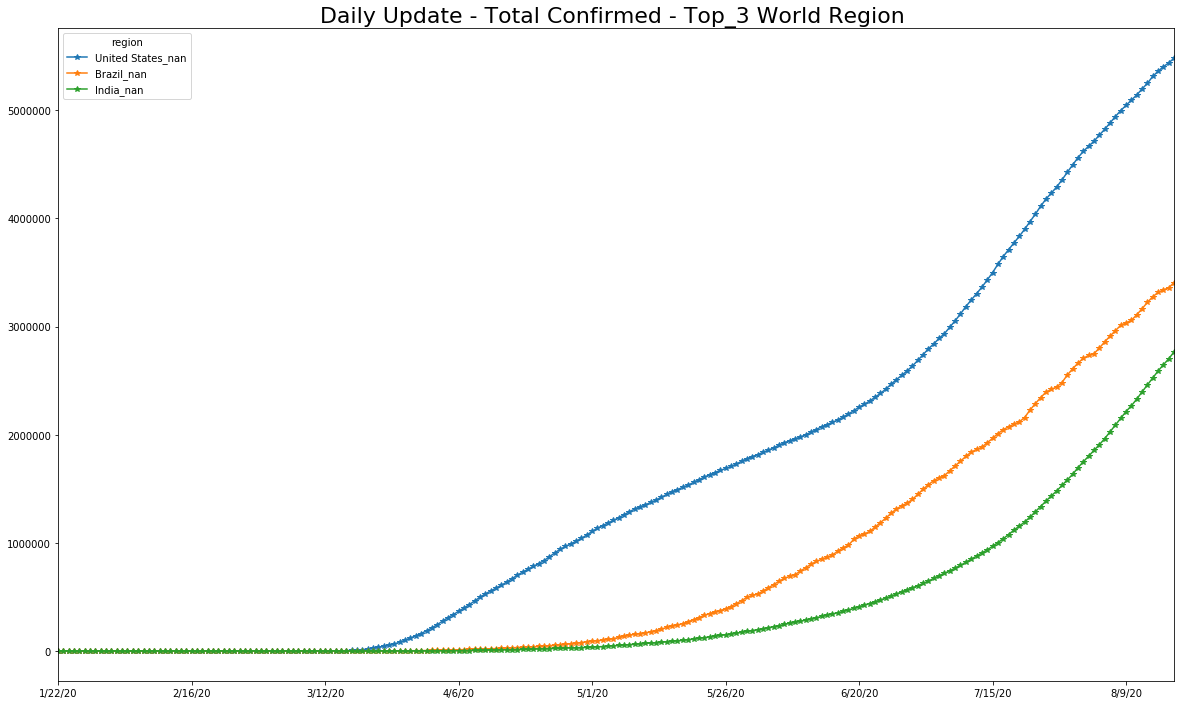

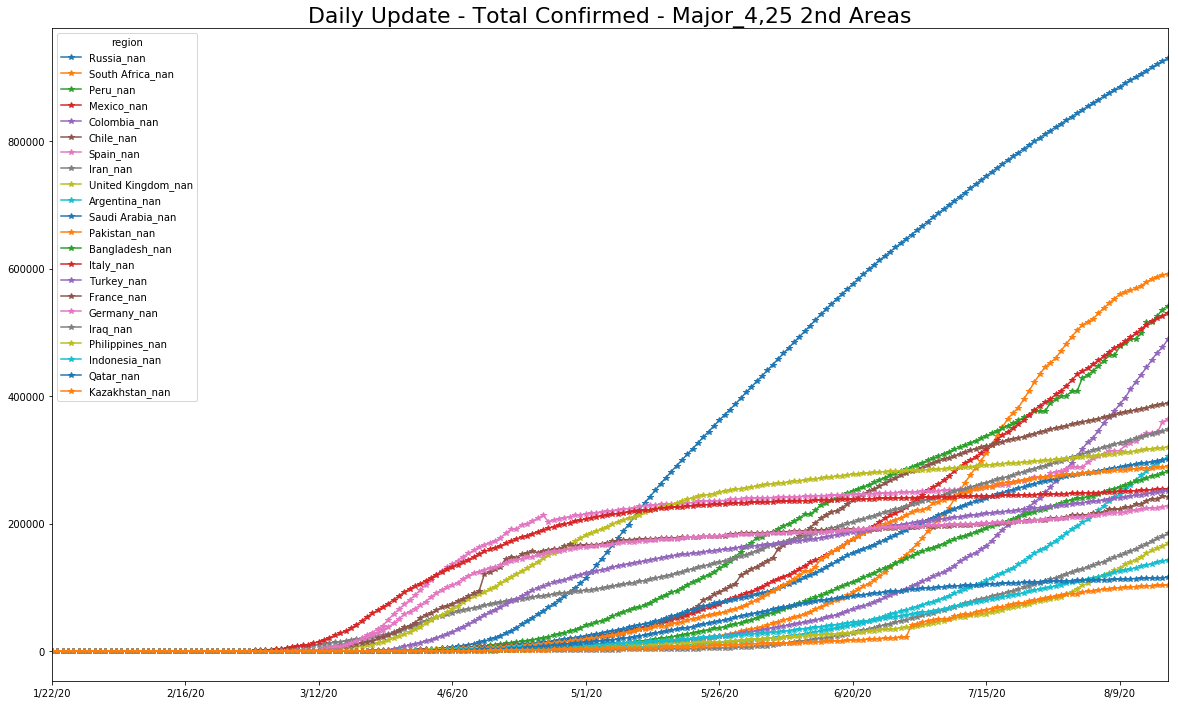

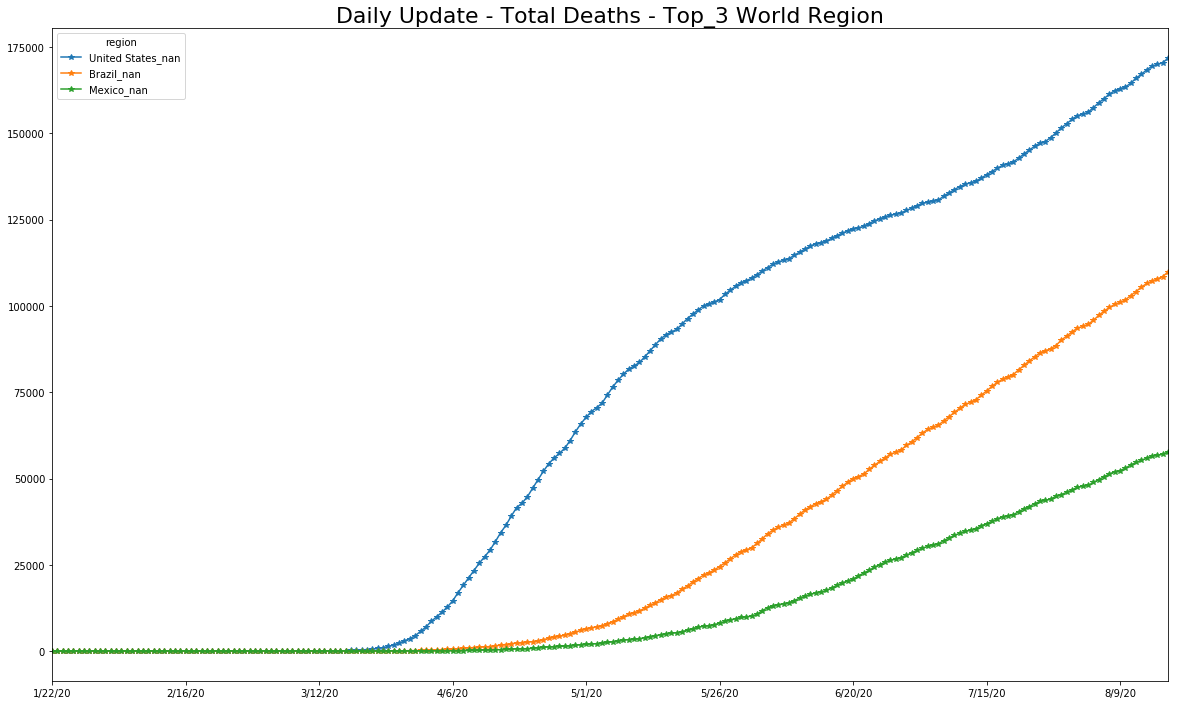

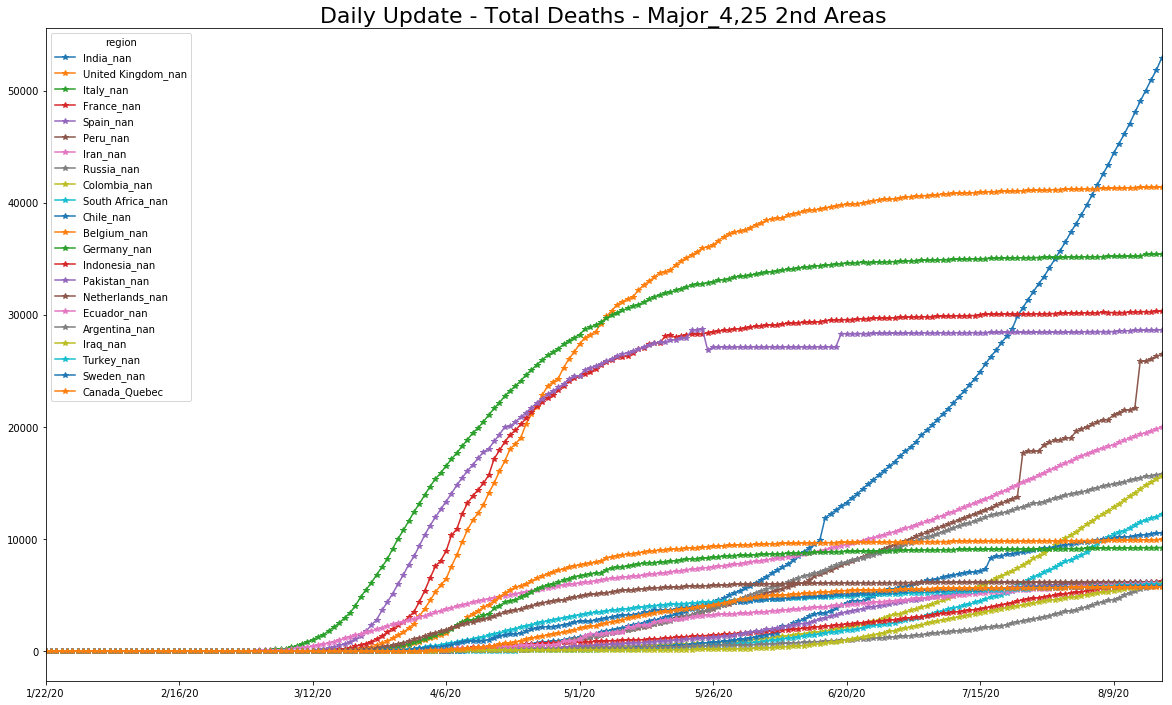

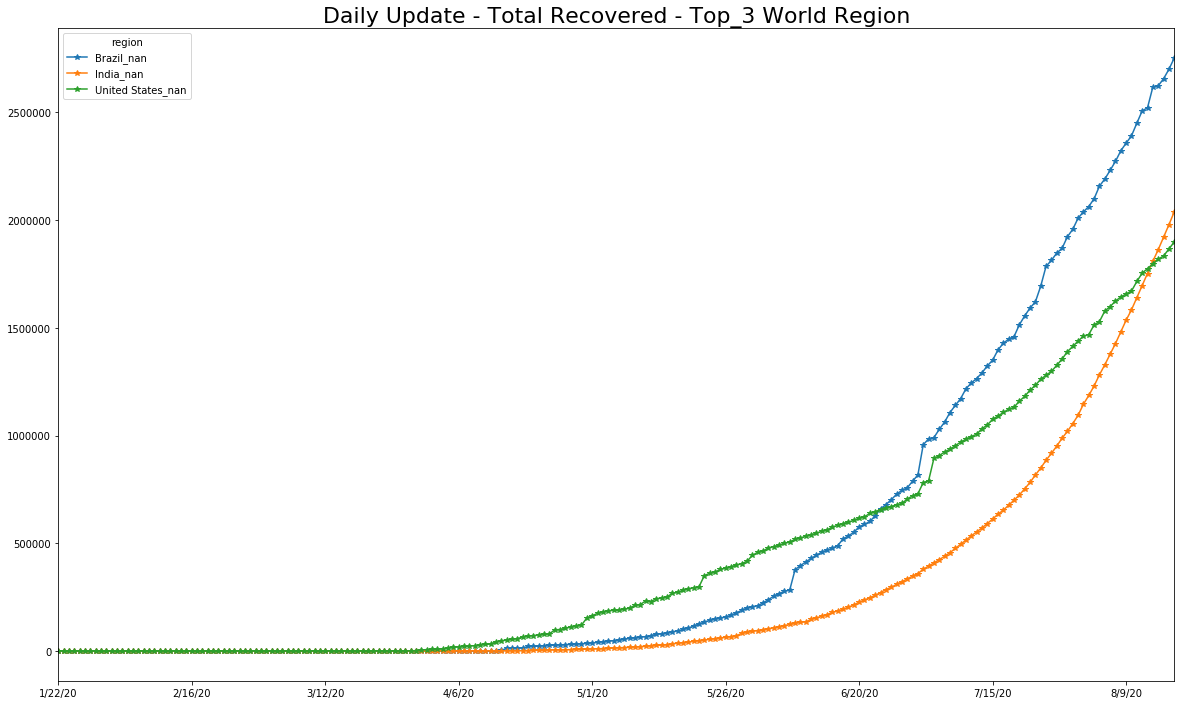

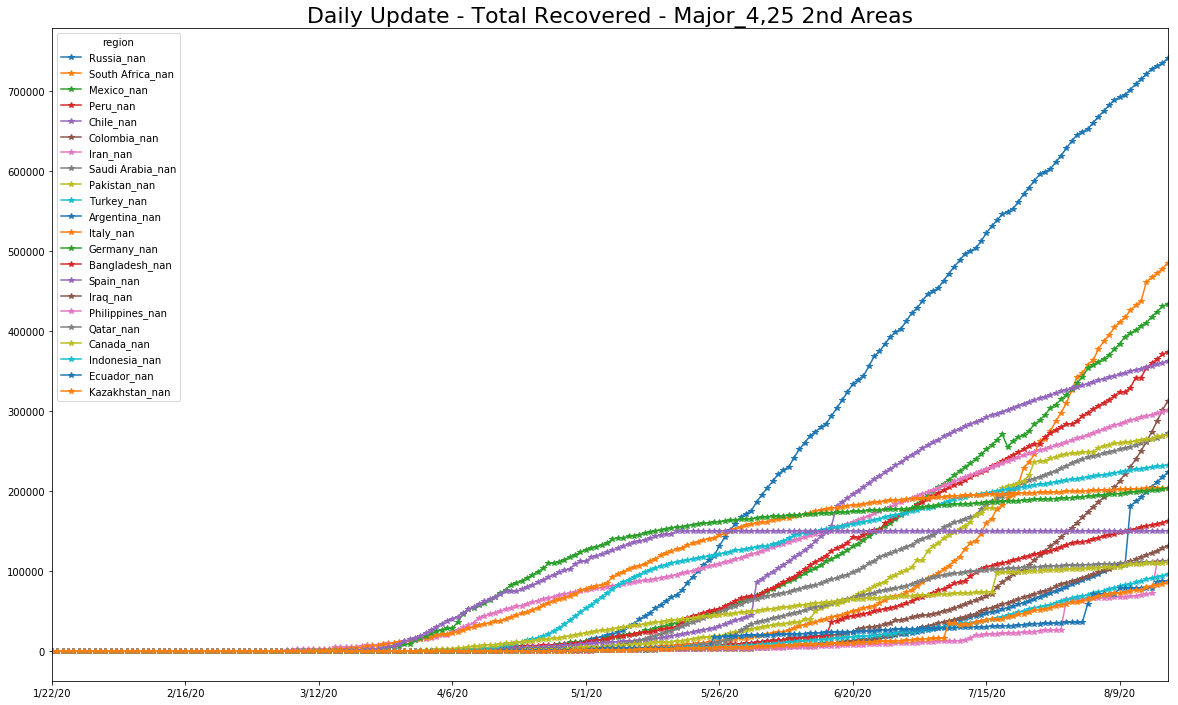

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/08/19


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
8/15/20            37551         7260        38133          989        1879   
8/16/20            37596         7380        38583          989        1906   
8/17/20            37599         7499        39025         1005        1935   
8/18/20            37599         7654        39444         1005        1966   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
8/15/20                       93         289100        41495   
8/16/20                       93         294569        41663   
8/17/20                       93         299126        41701   
8/18/20                       93         305966        41846   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
8/15/20                                     113                       3950   
8/16/20                                     113                       3957   
8/17/20                                     113                       3959   
8/18/20                                     113                       3966   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
8/15/20  ...            5361165         1434           34528          32607   
8/16/20  ...            5403213         1440           35329          33755   
8/17/20  ...            5438325         1457           35702          34802   
8/18/20  ...            5482416         1485           36352          35697   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
8/15/20          951                   16153                  10       1858   
8/16/20          964                   16534                  10       1869   
8/17/20          983                   16844                  10       1882   
8/18/20          989                   17306                  10       1889   

region   Zambia_nan  Zimbabwe_nan  
8/15/20        9186          5176  
8/16/20        9343          5261  
8/17/20        9839          5308  
8/18/20        9981          5378  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
52498 2020-07-21     Zimbabwe_nan       1820           102           293   
52499 2020-07-22     Zimbabwe_nan       2034           107           342   
52500 2020-07-23     Zimbabwe_nan       2124           214           423   
52501 2020-07-24     Zimbabwe_nan       2296            90           411   
52502 2020-07-25     Zimbabwe_nan       2434           172           476   
52503 2020-07-26     Zimbabwe_nan       2512           138           400   
52504 2020-07-27     Zimbabwe_nan       2704            78           388   
52505 2020-07-28     Zimbabwe_nan       2817           192           408   
52506 2020-07-29     Zimbabwe_nan       2879           113           383   
52507 2020-07-30     Zimbabwe_nan       3092            62           367   
52508 2020-07-31     Zimbabwe_nan       3169           213           388   
52509 2020-08-01     Zimbabwe_nan       3659            77           352   
52510 2020-08-02     Zimbabwe_nan       3921           490           780   
52511 2020-08-03     Zimbabwe_nan       4075           262           829   
52512 2020-08-04     Zimbabwe_nan       4221           154           906   
52513 2020-08-05     Zimbabwe_nan       4221           146           562   
52514 2020-08-06     Zimbabwe_nan       4339             0           300   
52515 2020-08-07     Zimbabwe_nan       4451           118           264   
52516 2020-08-08     Zimbabwe_nan       4575           112           230   
52517 2020-08-09     Zimbabwe_nan       4649           124           354   
52518 2020-08-10     Zimbabwe_nan       4748            74  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
52527 2020-08-19  Zimbabwe_nan          0            70           202   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
52527           560         101.318953         103.902821         111.623288   

       last_day  kalman_prediction  population  infected_rate  min  max  
52527      5378             5469.0    14862924       0.000004  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
52525  2020-08-17  Zimbabwe_nan       5308            85           271   
52526  2020-08-18  Zimbabwe_nan       5378            47           236   
52527  2020-08-19  Zimbabwe_nan          0            70           202   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
52525           612         101.642388         105.431062         113.164336   
52526           560         100.893556         104.653194         111.794650   
52527           560         101.318953         103.902821         111.623288   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
52525                 5261  ...    14862924       0.000004  NaN  NaN   
52526                 5308  ...    14862924       0.000004  NaN  NaN   
52527                 5378  ...    14862924       0.000004  NaN  NaN   

       population_percentage : infected_rate confirmed  \
52525                                         0.000354   
52526                                         0.000357   
52527                                         0.000362   

       population_percentage : factor 9/10 infected_rate confirmed  \
52525                                           0.003540             
52526                                           0.003572             
52527                                           0.003619             

       delta : new_cases  delta : new_cases per 1M hab  \
52525               79.0                      5.315239   
52526               98.0                      6.593588   
52527               91.0                      6.122618   

       delta : roling 7day AVG  \
52525                87.428571   
52526                80.000000   
52527                80.000000   

       delta : aprox 14-day case notification rate per 100k hab  
52525                                           8.235257         
52526                                           7.535529         
52527                                           7.535529         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  1.572962e+11  396605.869509  33908.020513


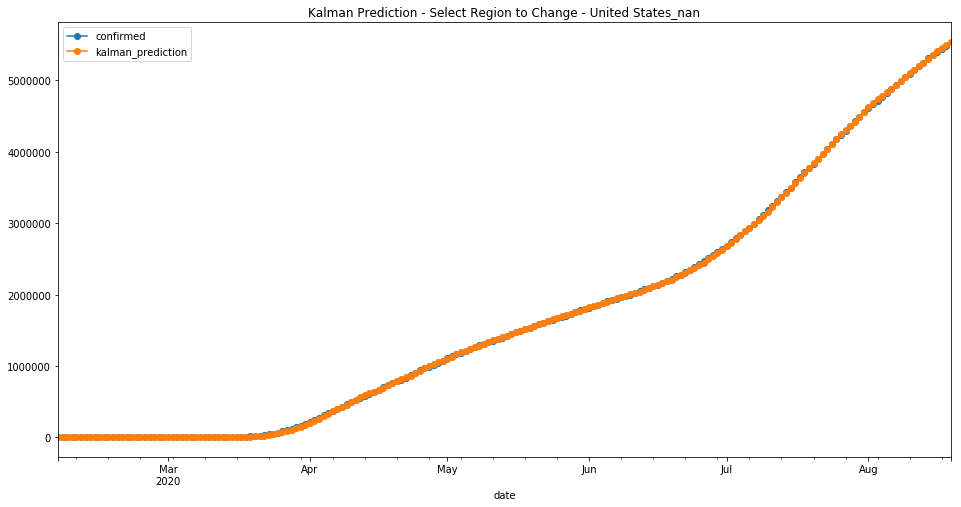

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  4.488104e+09  66993.312733  5424.841026


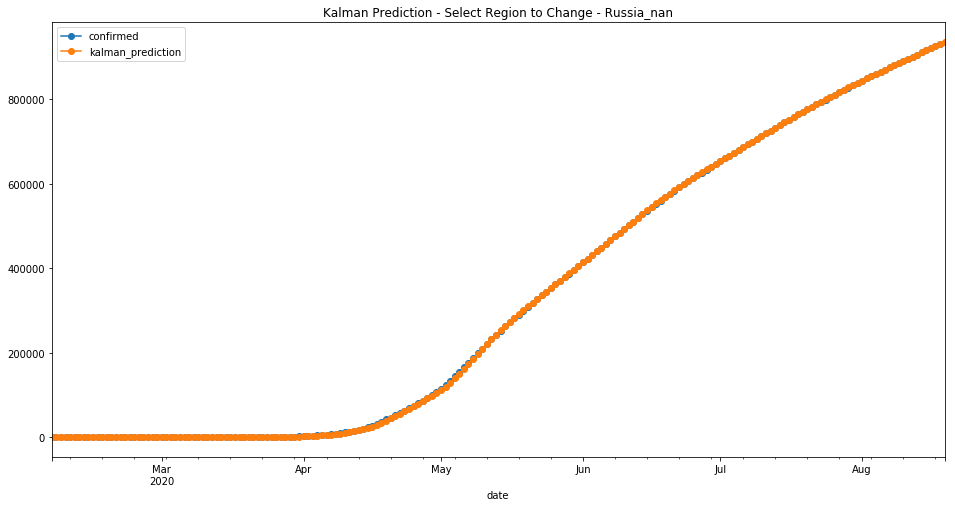

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  6.121320e+10  247413.021016  24434.846154


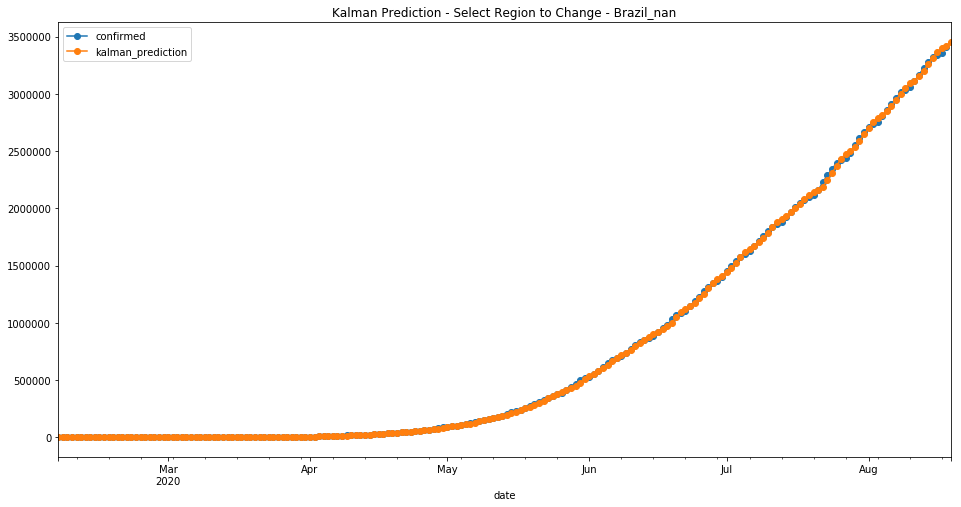

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  5.304862e+08  23032.285827  2144.425641


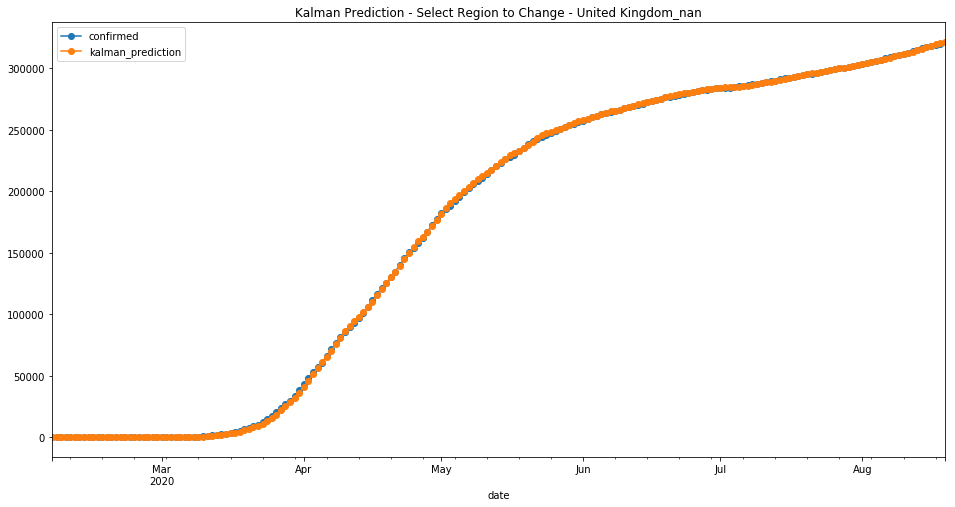

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnb_mlvak
  JVM stdout: /tmp/tmpnb_mlvak/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnb_mlvak/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 9 months and 23 days !!!
H2O cluster name:           H2O_from_python_unknownUser_4724dz
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-07-14
last_train_date= 2020-08-18
first_bootstrap_date= 2020-08-10
boost_bootstrap_date= 2020-08-15
first_test_date= 2020-08-09
last_test_date= 2020-08-19
first_valid_date= 2020-08-17


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   37041.0      37162 2020-08-10  Afghanistan_nan
1   37234.0      37269 2020-08-11  Afghanistan_nan
2   37349.0      37345 2020-08-12  Afghanistan_nan
3   37389.0      37424 2020-08-13  Afghanistan_nan
4   37473.0      37431 2020-08-14  Afghanistan_nan
5   37426.0      37551 2020-08-15  Afghanistan_nan
6   37621.0      37596 2020-08-16  Afghanistan_nan
7   37654.0      37599 2020-08-17  Afghanistan_nan
8   37598.0      37599 2020-08-18  Afghanistan_nan
9   37599.0          0 2020-08-19  Afghanistan_nan
10   6552.0       6536 2020-08-10      Albania_nan
11   6679.0       6676 2020-08-11      Albania_nan
12   6824.0       6817 2020-08-12      Albania_nan
13   6964.0       6971 2020-08-13      Albania_nan
14   7124.0       7117 2020-08-14      Albania_nan
15   7265.0       7260 2020-08-15      Albania_nan
16   7408.0       7380 2020-08-16      Albania_nan
17   7517.0       7499 2020-08-17      Albania_nan
18   7640.0       7654 2020-08-18      Albania_nan
19   7819.0          0 2020-08-19      Albania_nan
20  35693.0      35712 2020-08-10      Algeria_nan
21  36300.0      36204 2020-08-11      Algeria_nan
22  36767.0      36699 2020-08-12      Algeria_nan
23  37238.0      37187 2020-08-13      Algeria_nan
24  37718.0      37664 2020-08-14      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  34077.0      34107 2020-08-15  Azerbaijan_nan
176  34158.0      34219 2020-08-16  Azerbaijan_nan
177  34285.0      34343 2020-08-17  Azerbaijan_nan
178  34423.0      34474 2020-08-18  Azerbaijan_nan
179  34557.0          0 2020-08-19  Azerbaijan_nan
180    925.0        945 2020-08-10     Bahamas_nan
181    996.0        989 2020-08-11     Bahamas_nan
182   1043.0       1036 2020-08-12     Bahamas_nan
183   1087.0       1089 2020-08-13     Bahamas_nan
184   1154.0       1119 2020-08-14     Bahamas_nan
185   1161.0       1252 2020-08-15     Bahamas_nan
186   1352.0       1315 2020-08-16     Bahamas_nan
187   1387.0       1329 2020-08-17     Bahamas_nan
188   1357.0       1424 2020-08-18     Bahamas_nan
189   1519.0          0 2020-08-19     Bahamas_nan
190  44407.0      44397 2020-08-10     Bahrain_nan
191  44826.0      44804 2020-08-11     Bahrain_nan
192  45247.0      45264 2020-08-12     Bahrain_nan
193  45732.0      45726 2020-08-13     Bahrain_nan
194  46192.0      46052 2020-08-14     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  68866.0      68947 2020-08-10  Belarus_nan
221  68957.0      69005 2020-08-11  Belarus_nan
222  69003.0      69102 2020-08-12  Belarus_nan
223  69120.0      69203 2020-08-13  Belarus_nan
224  69221.0      69308 2020-08-14  Belarus_nan
225  69317.0      69308 2020-08-15  Belarus_nan
226  69248.0      69516 2020-08-16  Belarus_nan
227  69574.0      69589 2020-08-17  Belarus_nan
228  69583.0      69673 2020-08-18  Belarus_nan
229  69647.0          0 2020-08-19  Belarus_nan
230  74735.0      74620 2020-08-10  Belgium_nan
231  75105.0      75008 2020-08-11  Belgium_nan
232  75504.0      75647 2020-08-12  Belgium_nan
233  76372.0      76191 2020-08-13  Belgium_nan
234  76773.0      77113 2020-08-14  Belgium_nan
235  77817.0      77869 2020-08-15  Belgium_nan
236  78501.0      78323 2020-08-16  Belgium_nan
237  78673.0      78534 2020-08-17  Belgium_nan
238  78837.0      78897 2020-08-18  Belgium_nan
239  79404.0          0 2020-08-19  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  17052380.752734274
# MSE on the validation data =  422684028297.9047
# R^2 on the training data =  0.9999393266560876
# R^2 on the validation data =  0.4884516154587182


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1597834218344_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 17052380.752734274
RMSE: 4129.452839388564
MAE: 852.2002444840308
RMSLE: 0.33915232070223
Mean Residual Deviance: 17052380.752734274

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 422684028297.9047
RMSE: 650141.5448176687
MAE: 155393.63063999527
RMSLE: 6.514524619873424
Mean Residual Deviance: 422684028297.9047
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2020-08-19 10:50:27  0.090 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2020-08-19 10:50:27  0.642 sec   1.0                18570.119045869847  3268.9950372378394  344849321.3777781    657327.9336107321  153924.86071227476  432080012304.955
     2020-08-19 10:50:27  0.806 sec   2.0                16574.42246002943   2858.146944187028   274711479.88352805   668845.1454459574  156192.23432221284  447353828586.6239
     2020-08-19 10:50:28  0.964 sec   3.0                16251.85772182111   2675.979540332492   264122879.41031644   670365.3435410073  155025.32928631754  449389693820.85266
     2020-08-19 10:50:28  1.107 sec   4.0                13603.16526298904   2452.4966296201987  185046105.17219168   667582.5449158567  154094.3465485444   445666454276.3318
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2020-08-19 10:50:43  16.250 sec  220.0              4263.856839556113   887.4540439365112   18180475.148229446   649490.3310730385  155589.95116192417  421837690157.36523
     2020-08-19 10:50:47  20.276 sec  297.0              4269.419779934511   881.0147646851916   18227945.257296048   649769.2014564276  155308.3573171513   422200015161.3236
     2020-08-19 10:50:51  24.287 sec  374.0              4274.817042098374   870.2546113631512   18274060.743414696   650346.9609260722  155477.7187328424   422951169585.778
     2020-08-19 10:50:55  28.315 sec  451.0              4126.9654833160575  854.289619838969    17031844.100482143   649926.6112096953  155508.41443532516  422404599958.51855
     2020-08-19 10:50:58  31.193 sec  500.0              4129.452839388564   852.2002444840308   17052380.752734274   650141.5448176687  155393.63063999527  422684028297.9047


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  3.26434e+17            1                    0.335733
last_day           2.7858e+17             0.853402             0.286516
7_day_change       1.49546e+17            0.458121             0.153807
3_day_change       9.73934e+16            0.298355             0.100168
1_day_change       6.49945e+16            0.199105             0.0668461
infected_rate      2.36552e+16            0.0724656            0.0243291
region             1.8508e+16             0.0566974            0.0190352
min                3.61699e+15            0.0110803            0.00372003
max                3.30666e+15            0.0101296            0.00340086
1_day_change_rate  2.36233e+15            0.00723678           0.00242963
3_day_change_rate  1.96657e+15            0.00602439           0.00202259
7_day_change_rate  1.9377e+15             0.00593595           0.0019929

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         3.264342e+17           1.000000    0.335733
1            last_day         2.785796e+17           0.853402    0.286516
2        7_day_change         1.495465e+17           0.458121    0.153807
3        3_day_change         9.739340e+16           0.298355    0.100168
4        1_day_change         6.499455e+16           0.199105    0.066846
5       infected_rate         2.365524e+16           0.072466    0.024329
6              region         1.850797e+16           0.056697    0.019035
7                 min         3.616990e+15           0.011080    0.003720
8                 max         3.306658e+15           0.010130    0.003401
9   1_day_change_rate         2.362334e+15           0.007237    0.002430
10  3_day_change_rate         1.966566e+15           0.006024    0.002023
11  7_day_change_rate         1.937697e+15           0.005936    0.001993

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


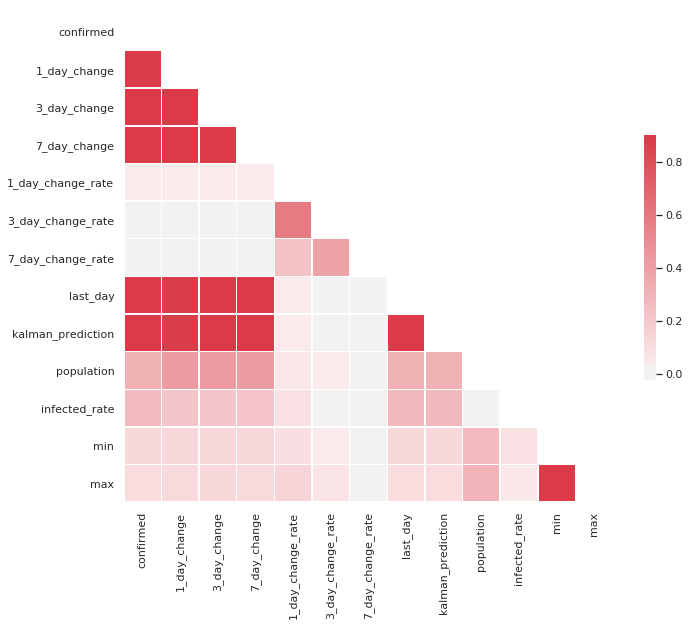

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.882557
3_day_change         0.900056
7_day_change         0.911618
1_day_change_rate    0.035437
3_day_change_rate    0.007891
7_day_change_rate   -0.008905
last_day             0.984170
kalman_prediction    0.984279
population           0.319704
infected_rate        0.274559
min                  0.121969
max                  0.107823
Name: confirmed, dtype: float64


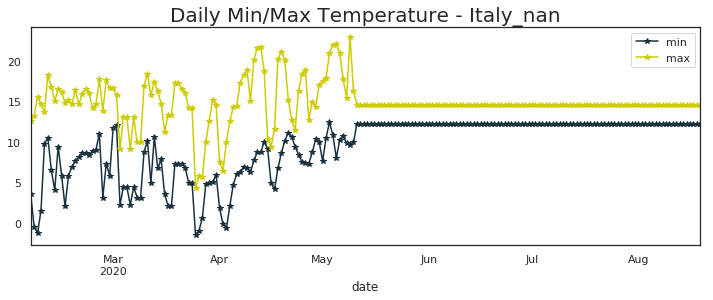

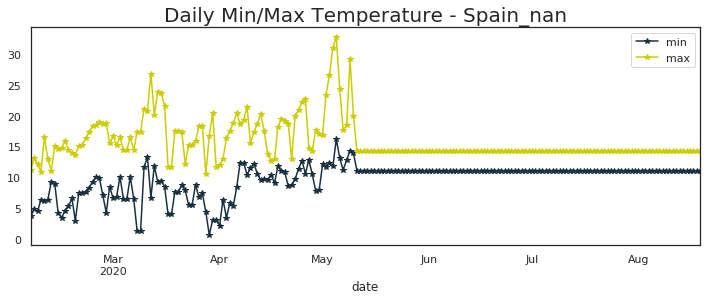

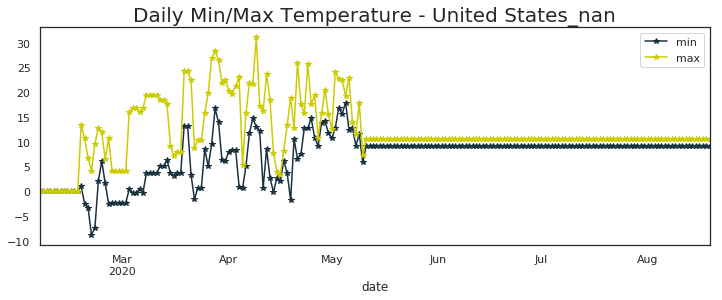

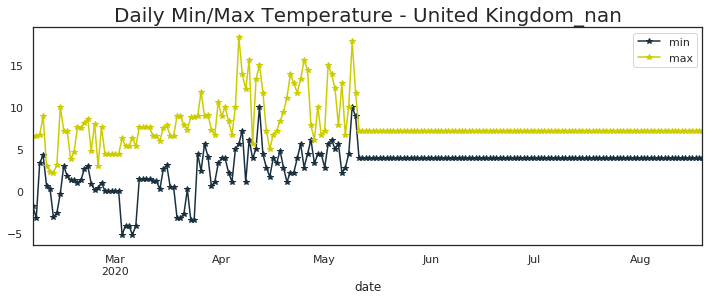

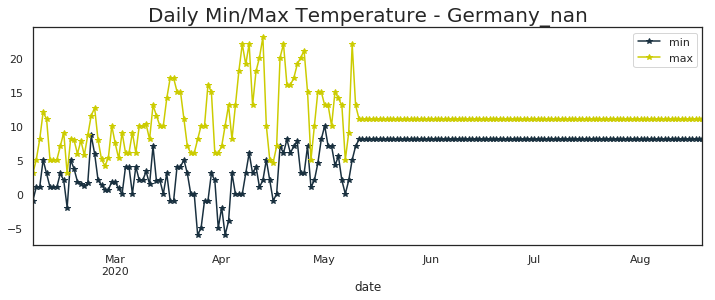

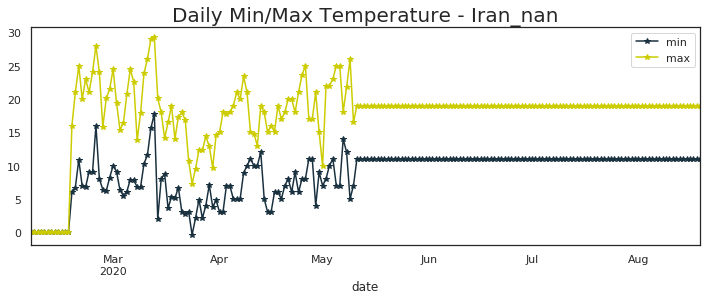

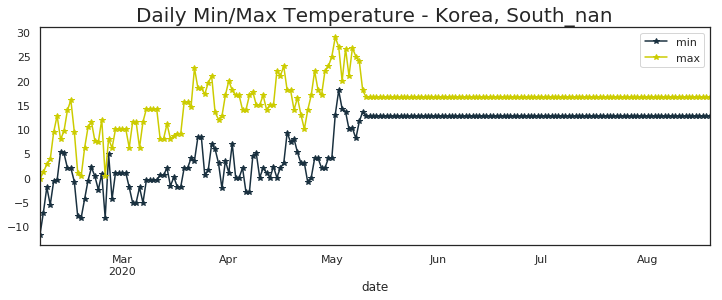

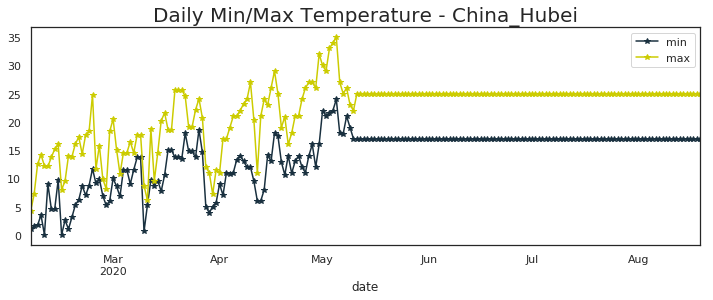

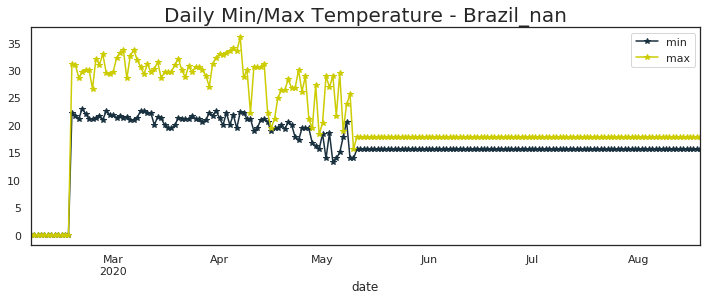

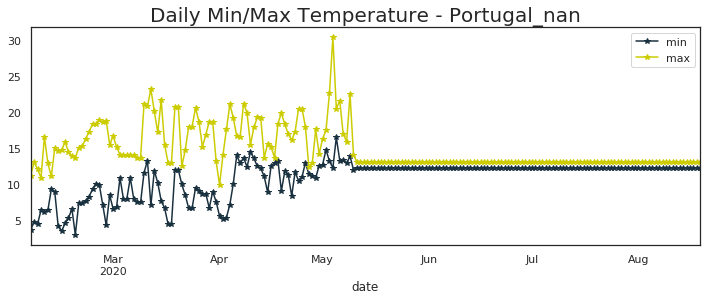

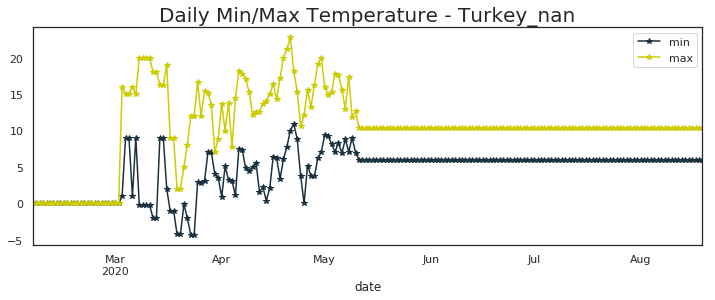

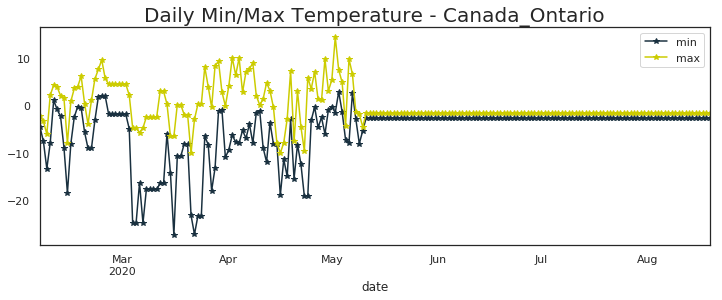

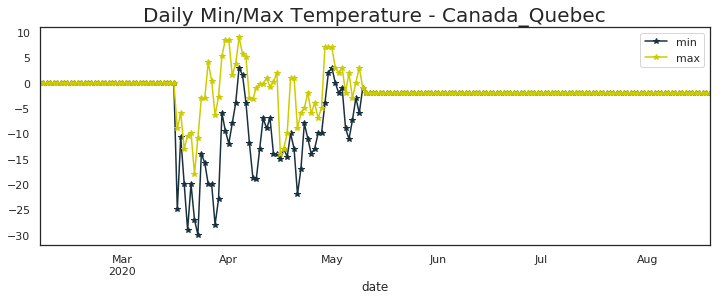

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Brazil_nan                  23.0  36.0
India_nan                   30.0  43.0
Russia_nan                  13.0  30.0
South Africa_nan             0.0   0.0
Peru_nan                     0.0   0.0
Mexico_nan                   0.0   0.0
Colombia_nan                 0.0   0.0
Chile_nan                    0.0   0.0
Spain_nan                   16.2  32.7
Iran_nan                    17.8  29.3
United Kingdom_nan          10.0  18.3
Argentina_nan                0.0   0.0
Saudi Arabia_nan             0.0   0.0
Pakistan_nan                16.0  28.0
Bangladesh_nan               0.0   0.0
Italy_nan                   12.4  22.9
Turkey_nan                  10.9  22.8
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Iraq_nan                    21.2  29.1
Philippines_nan             27.8  35.0
Indonesia_nan               

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

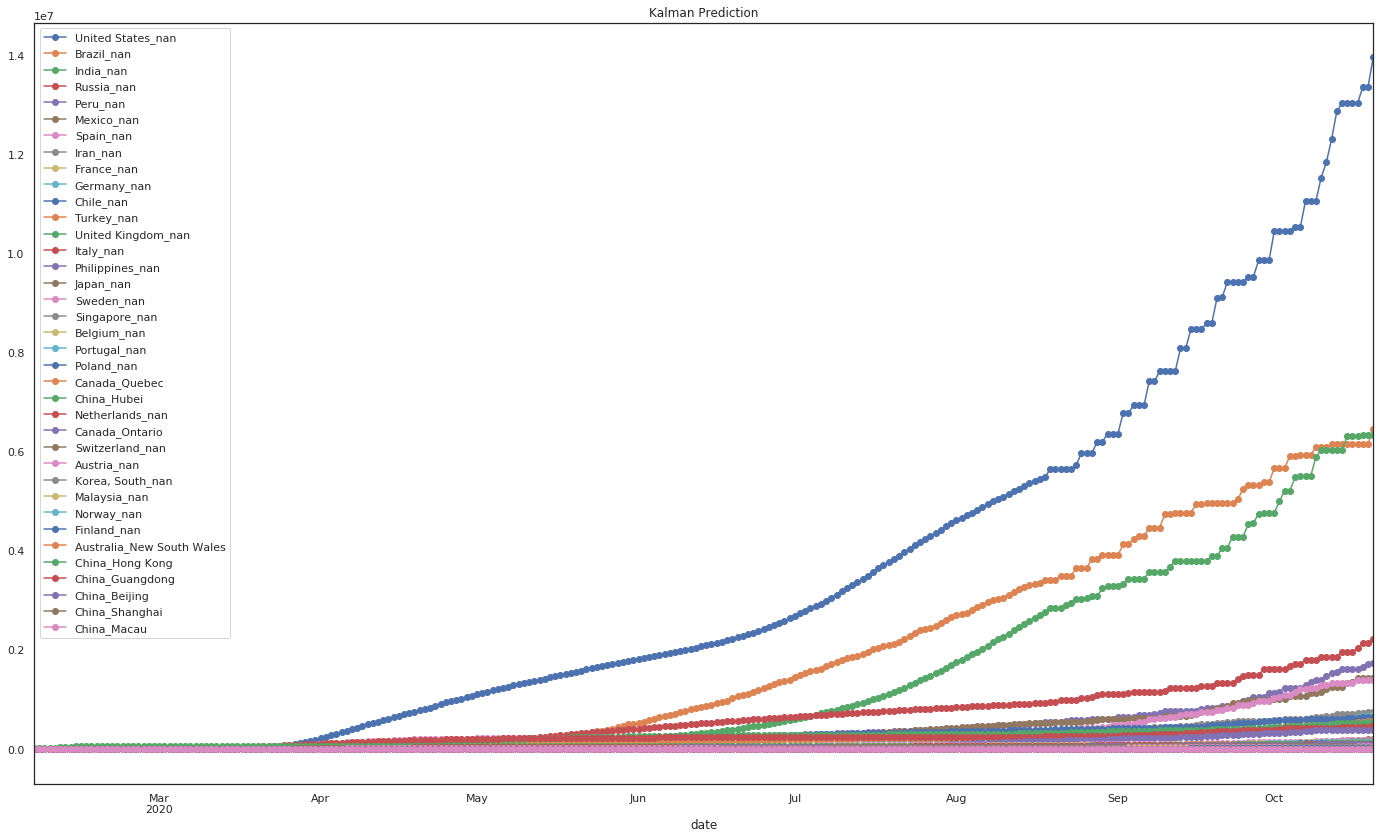

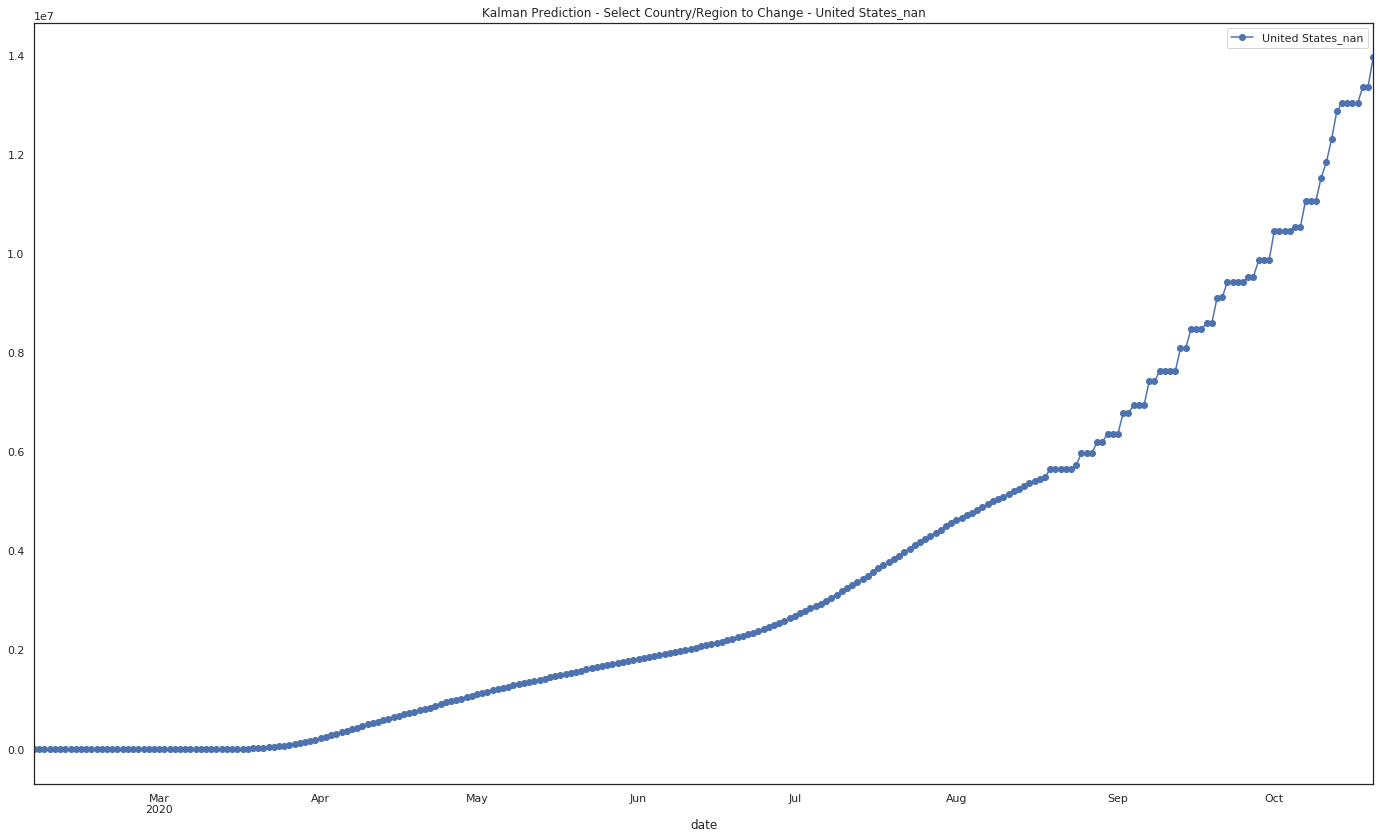

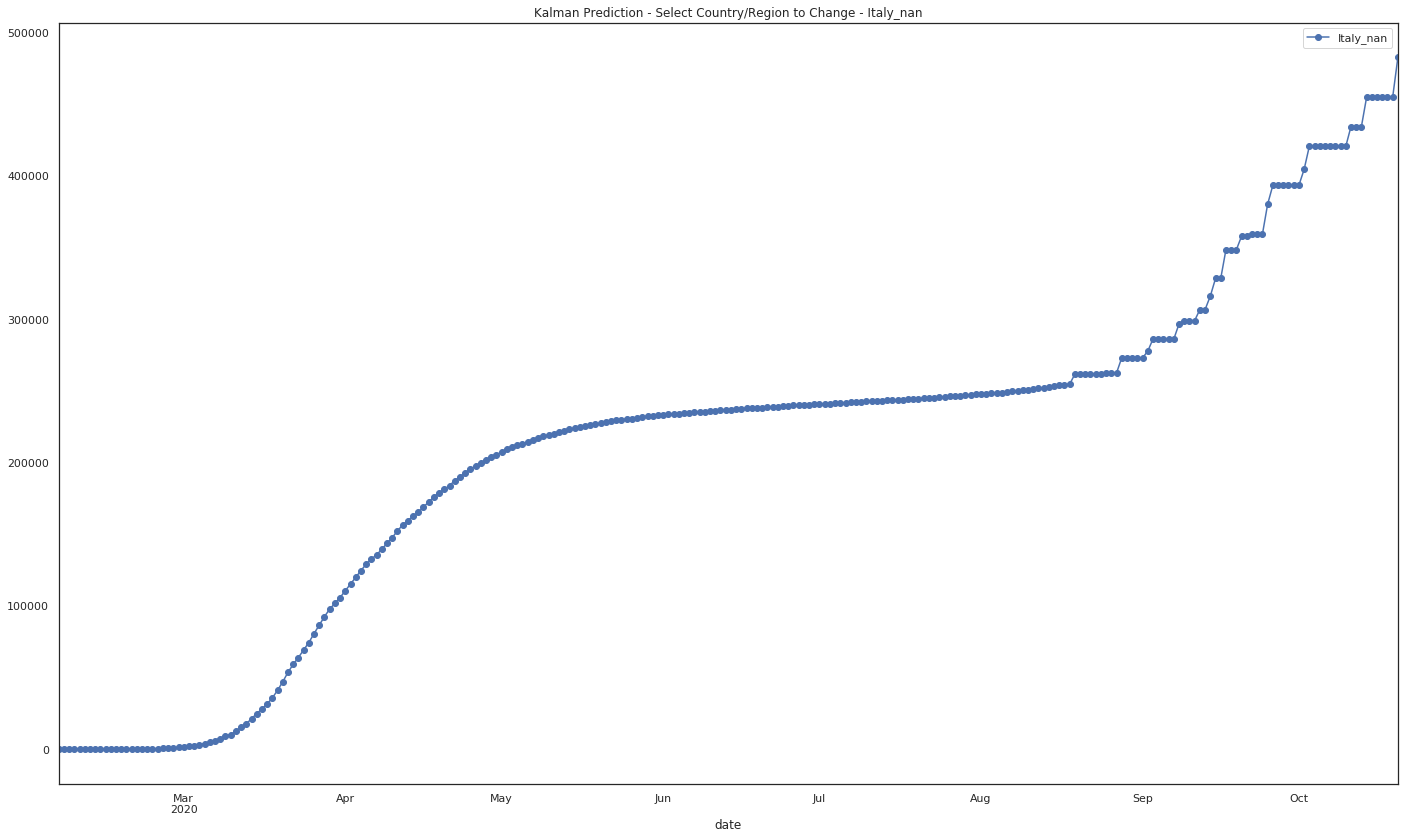

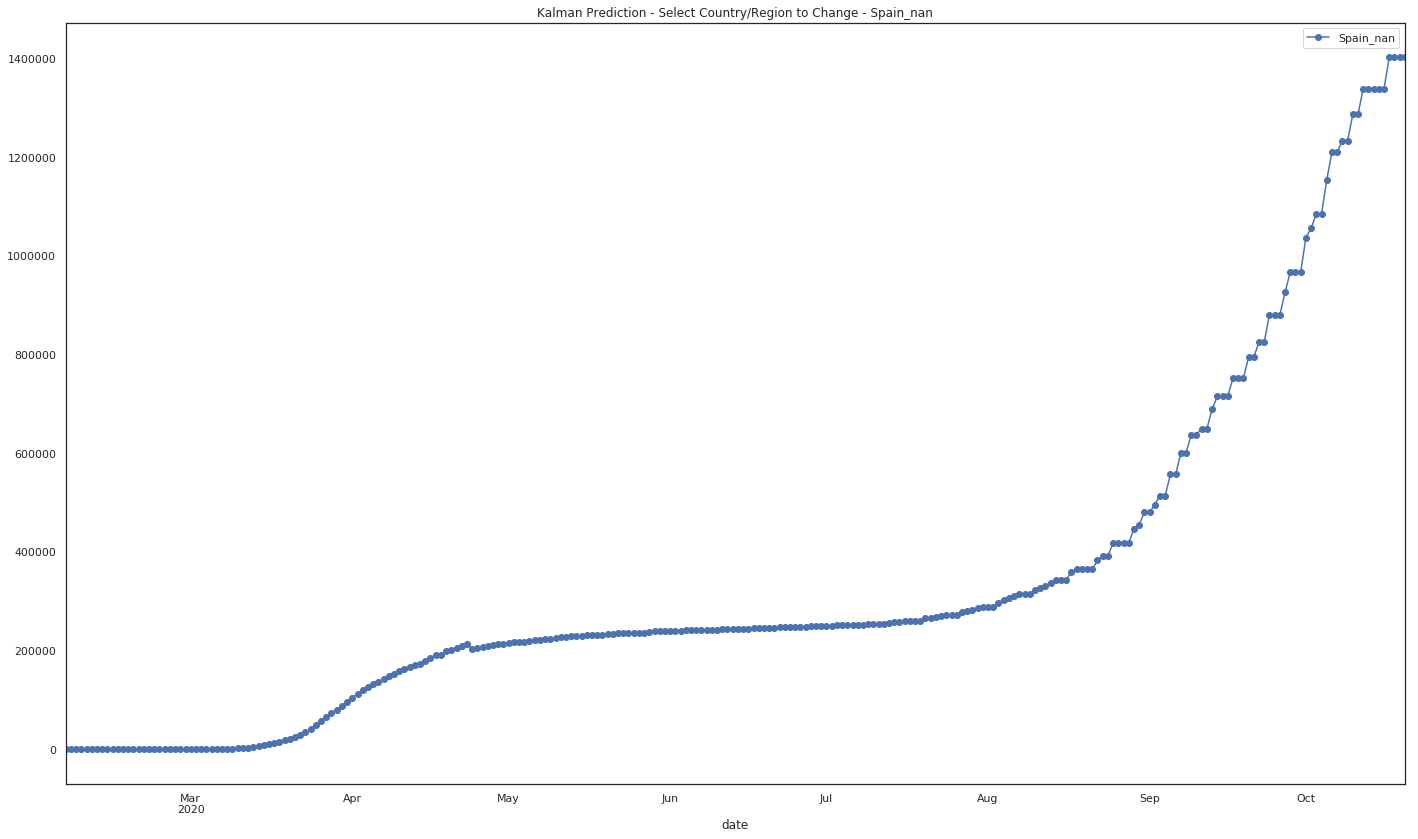

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


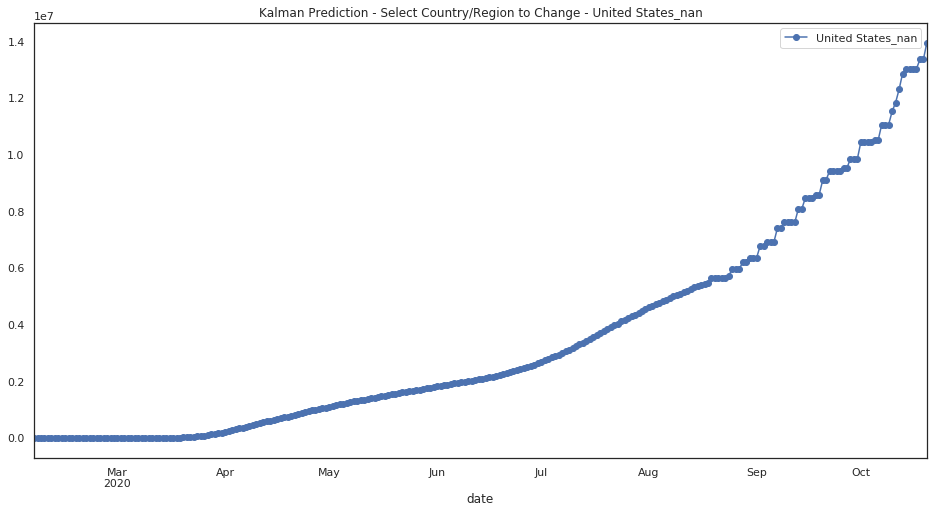

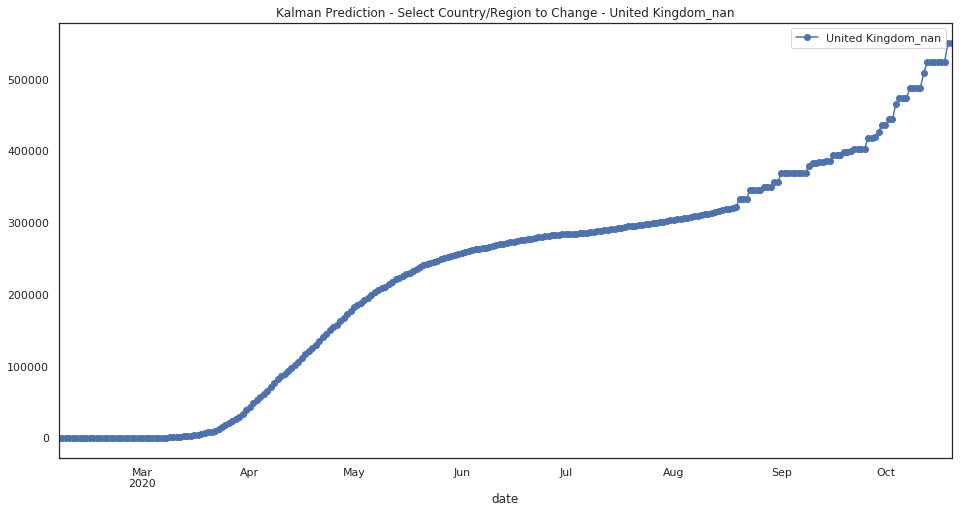

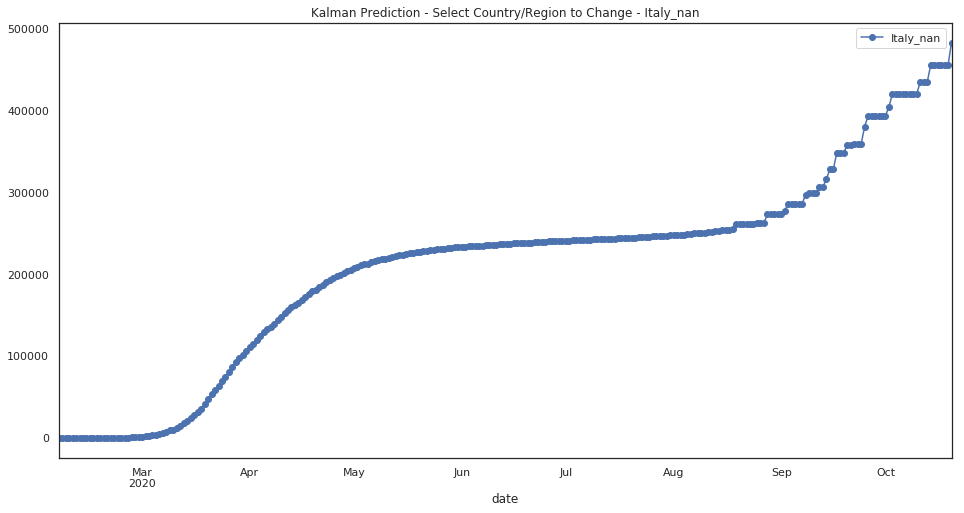

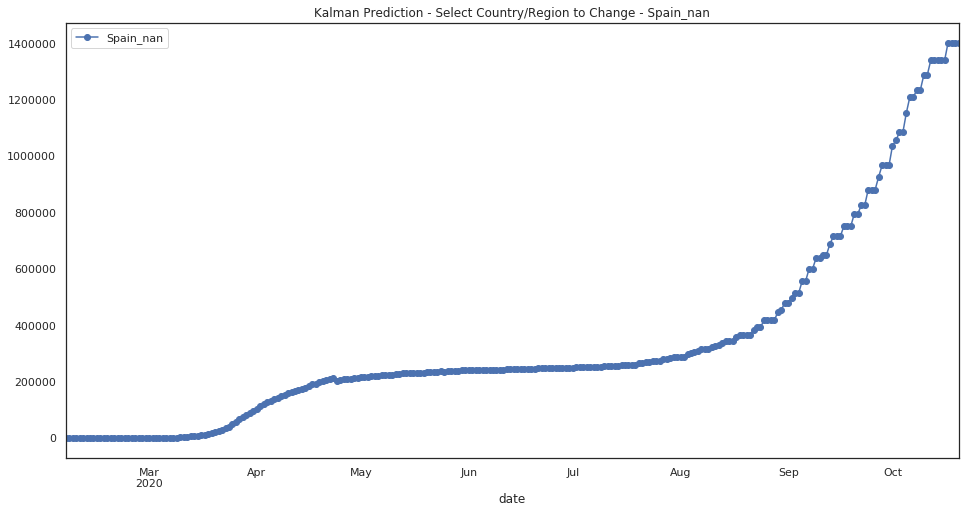

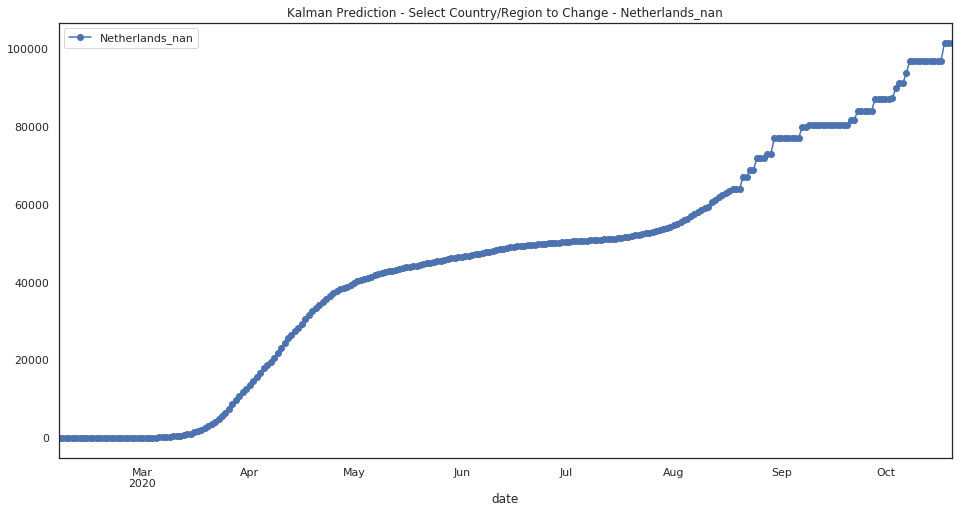

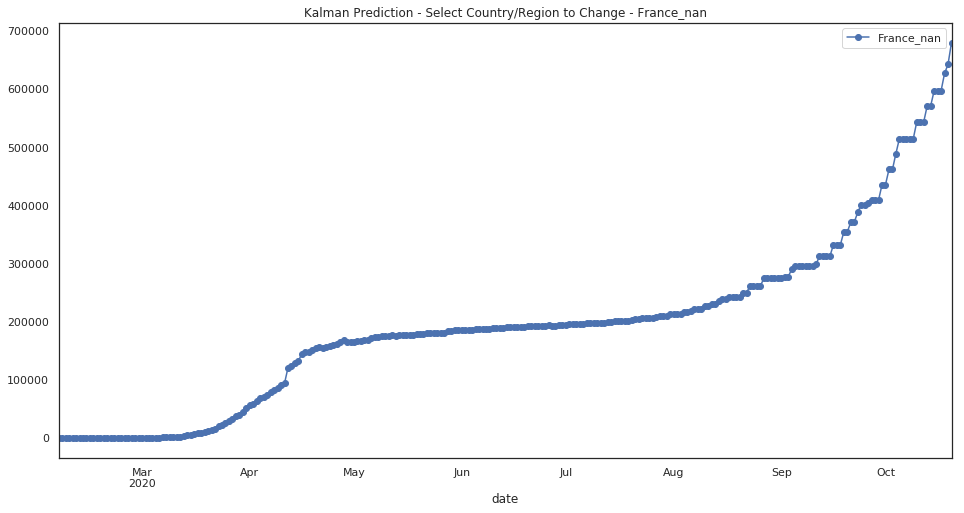

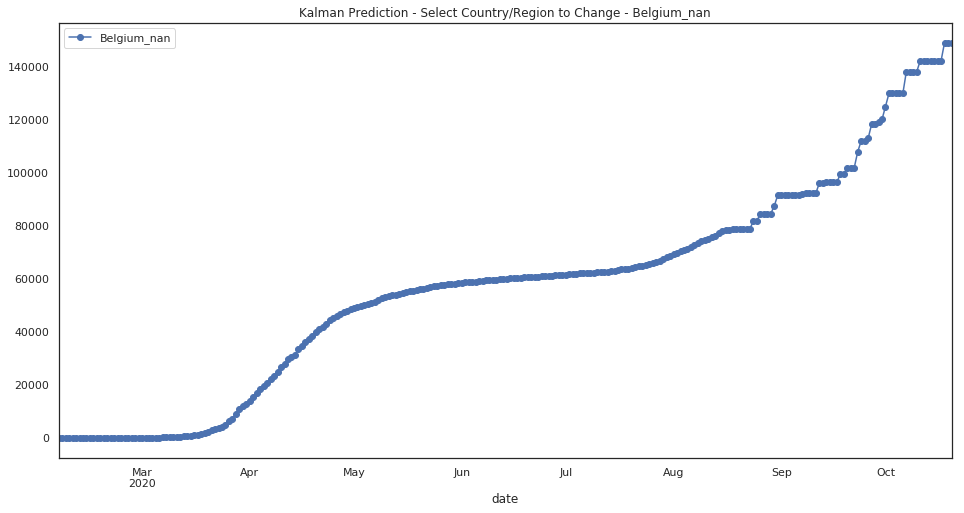

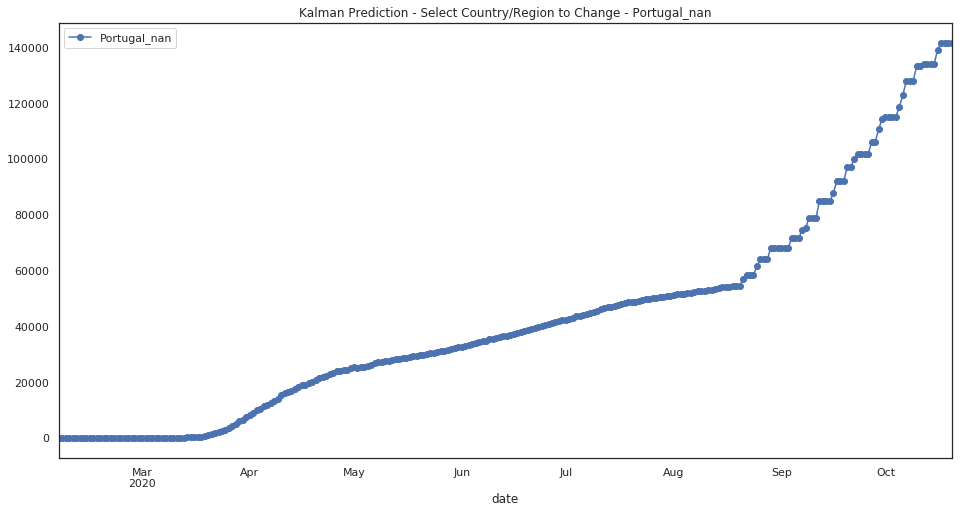

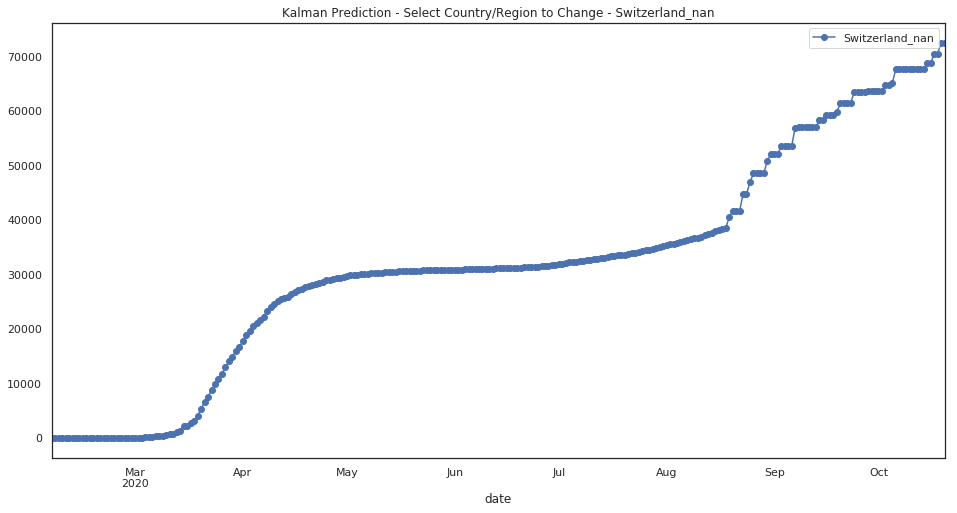

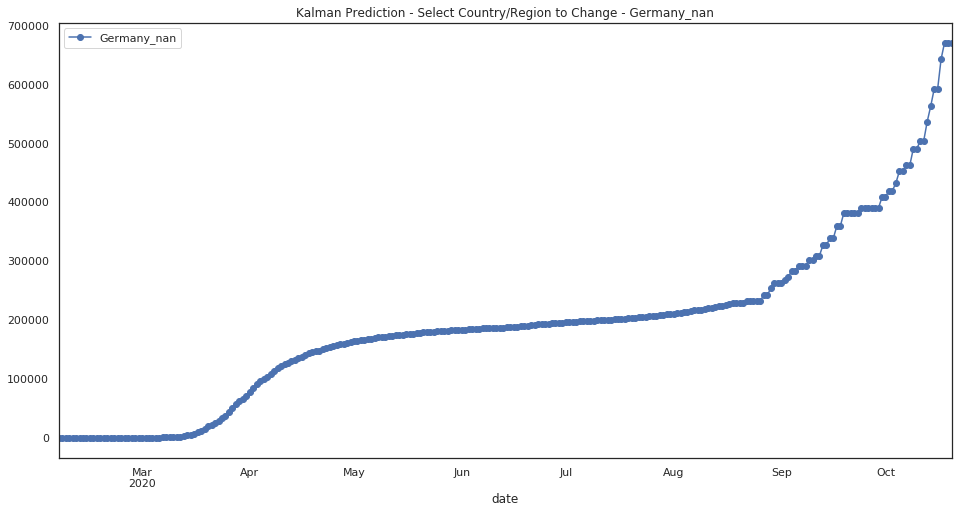

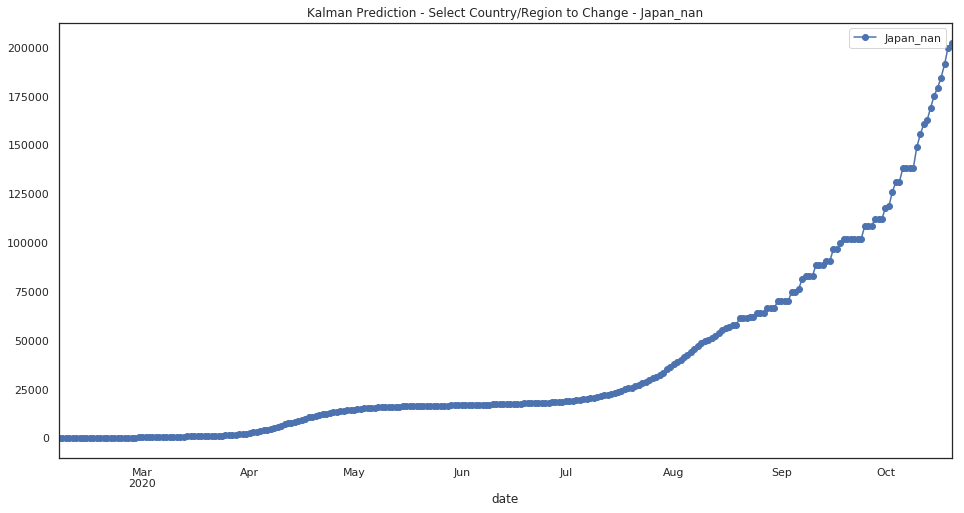

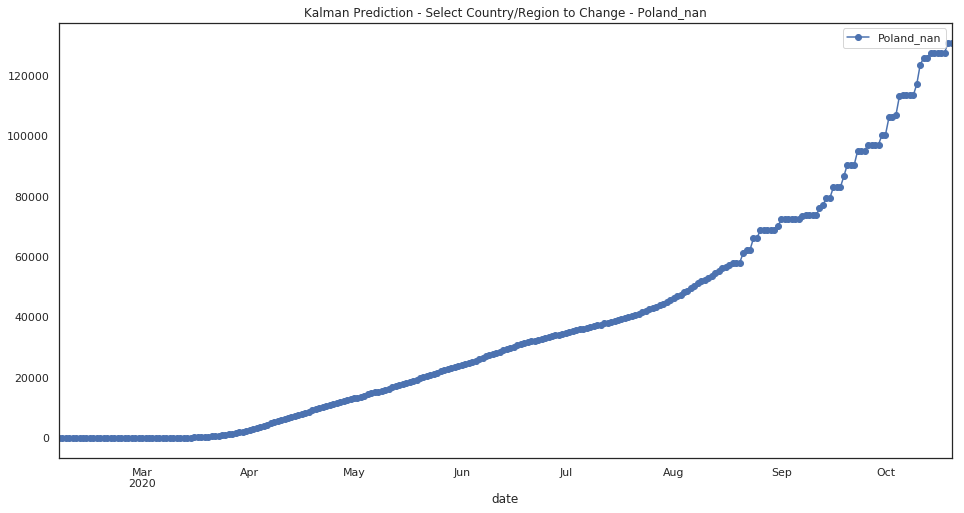

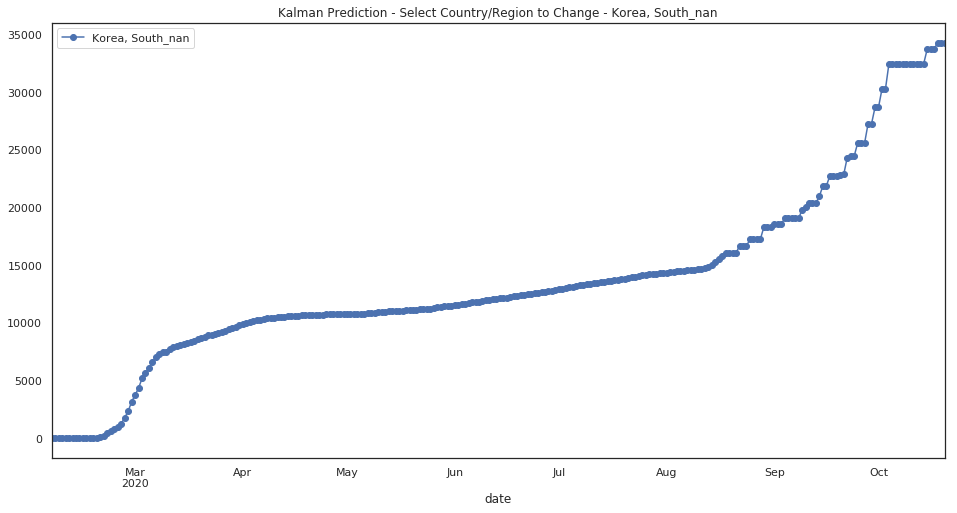

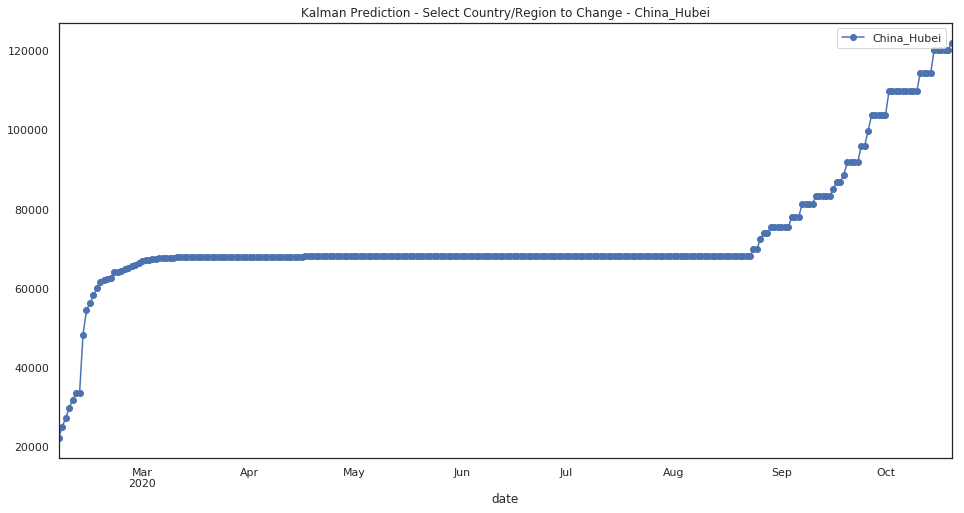

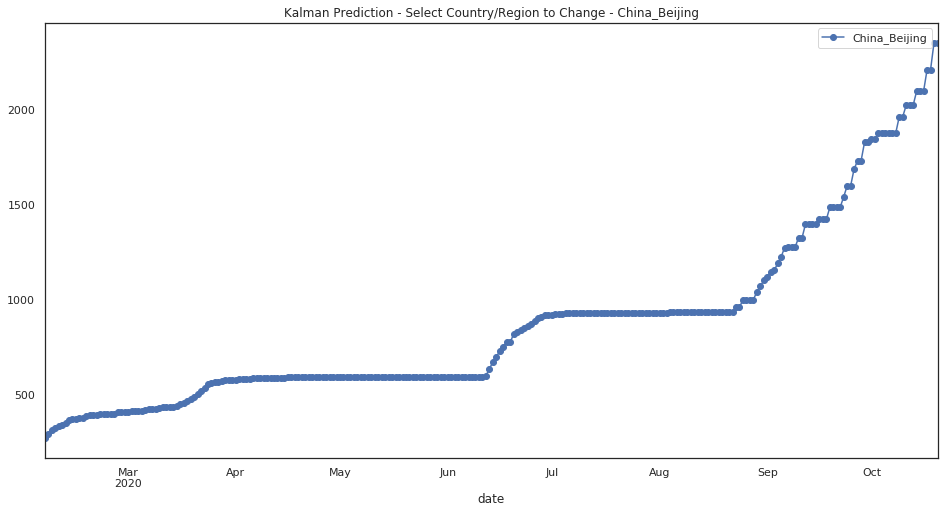

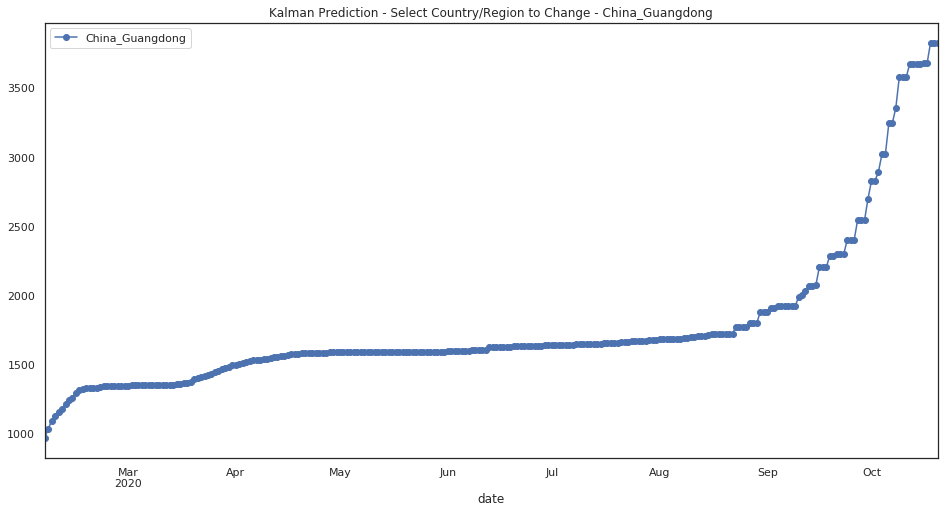

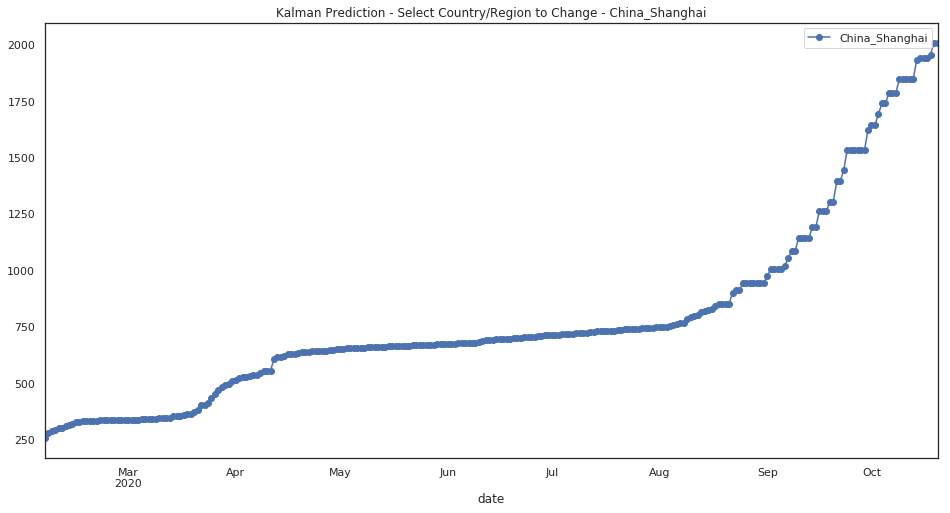

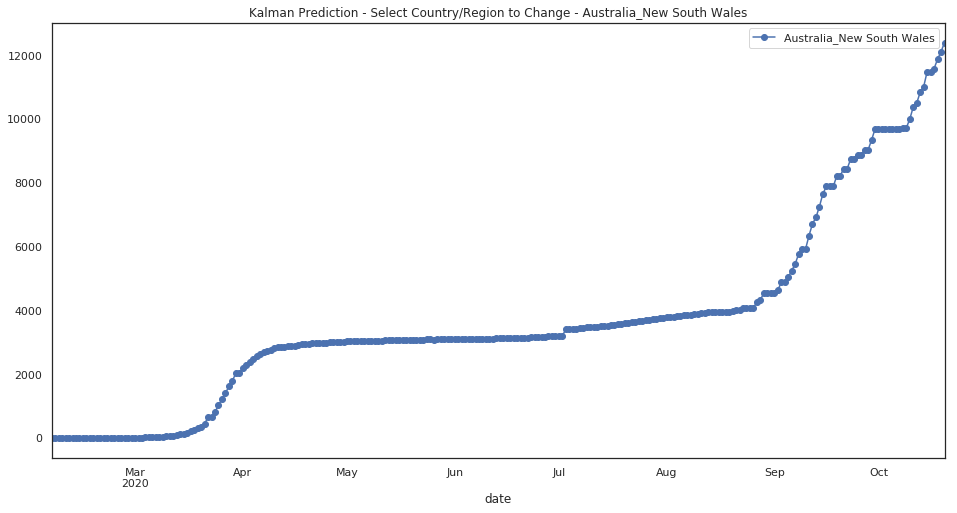

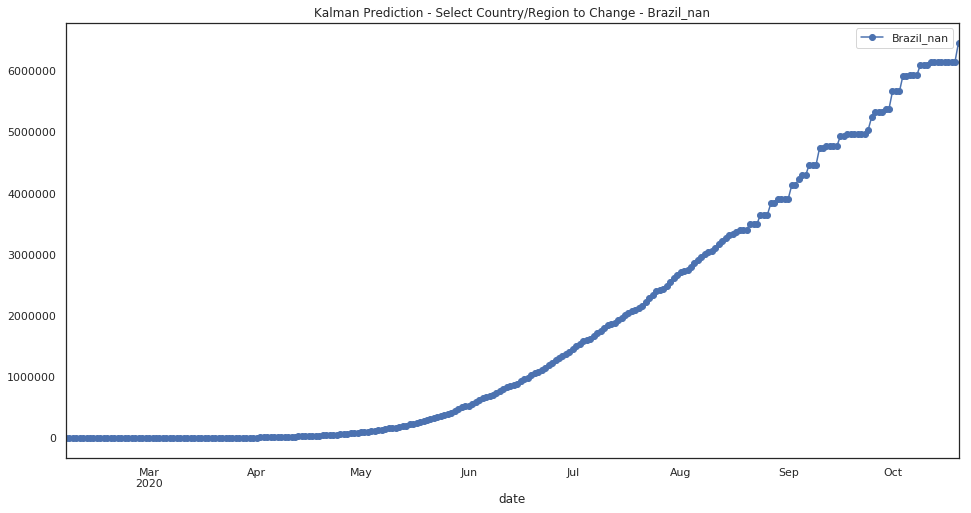

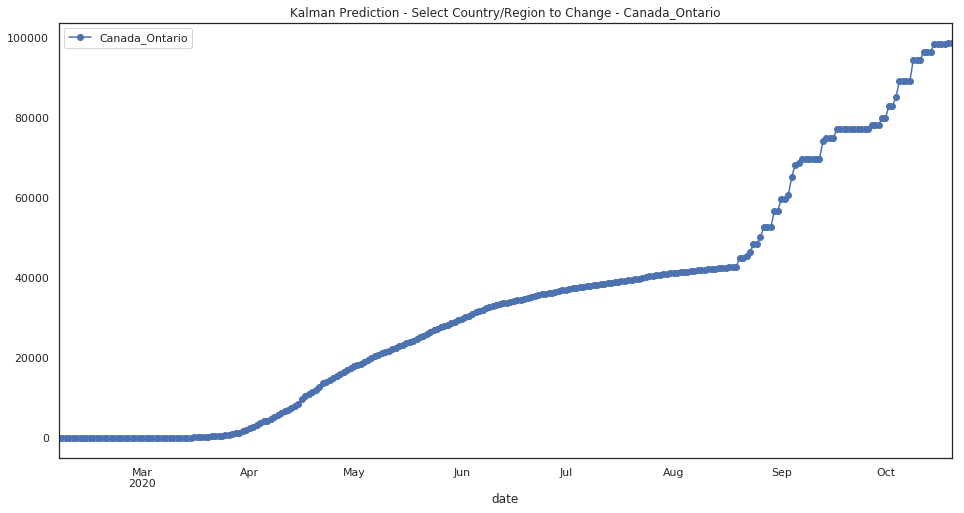

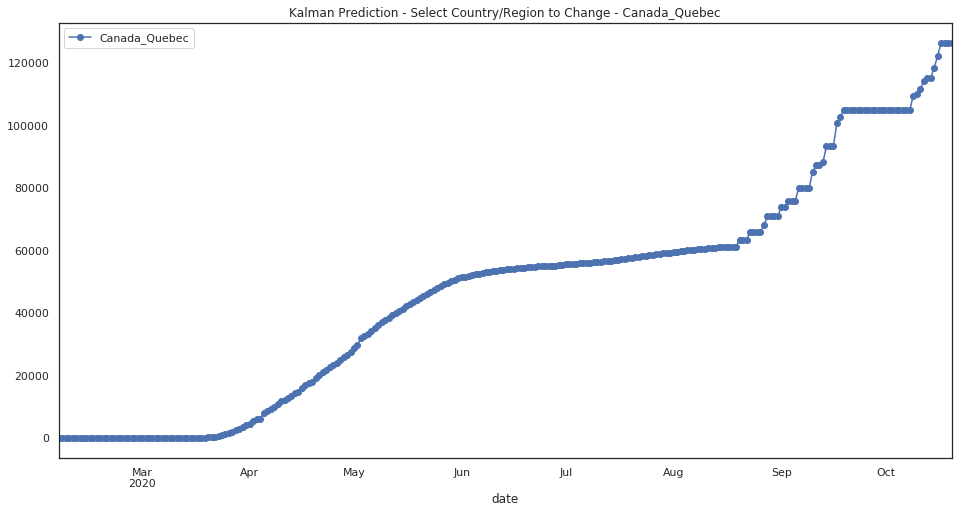

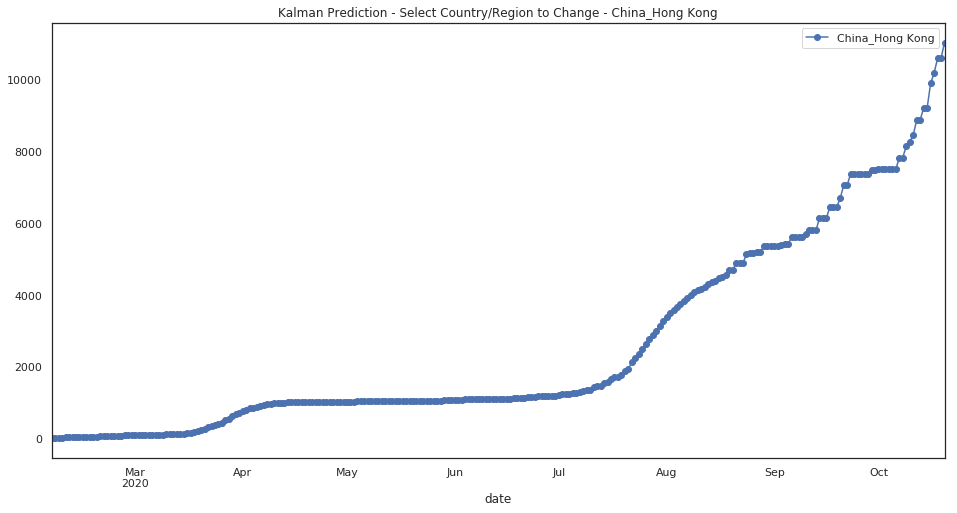

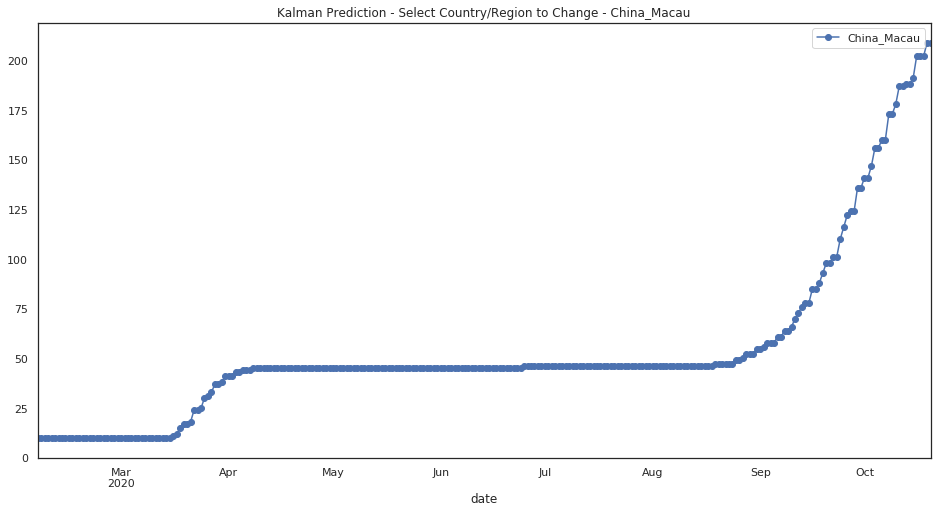

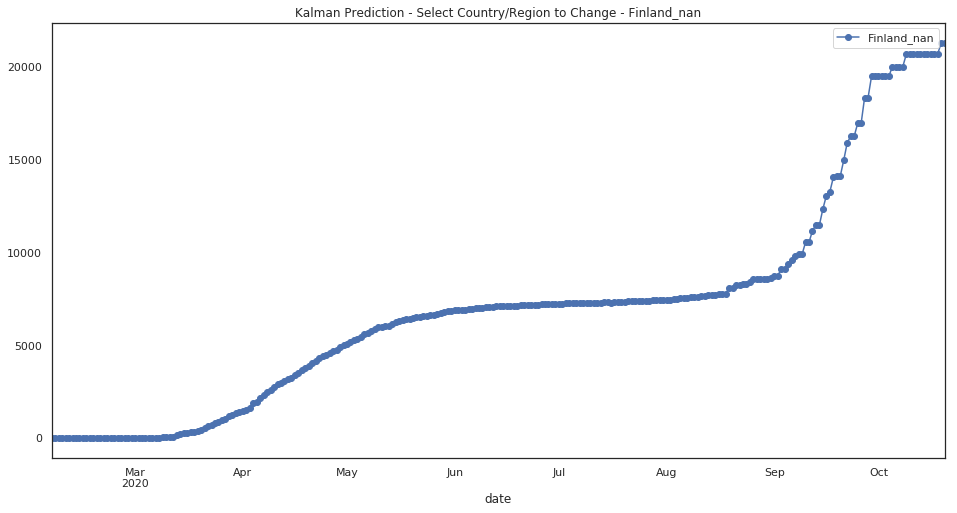

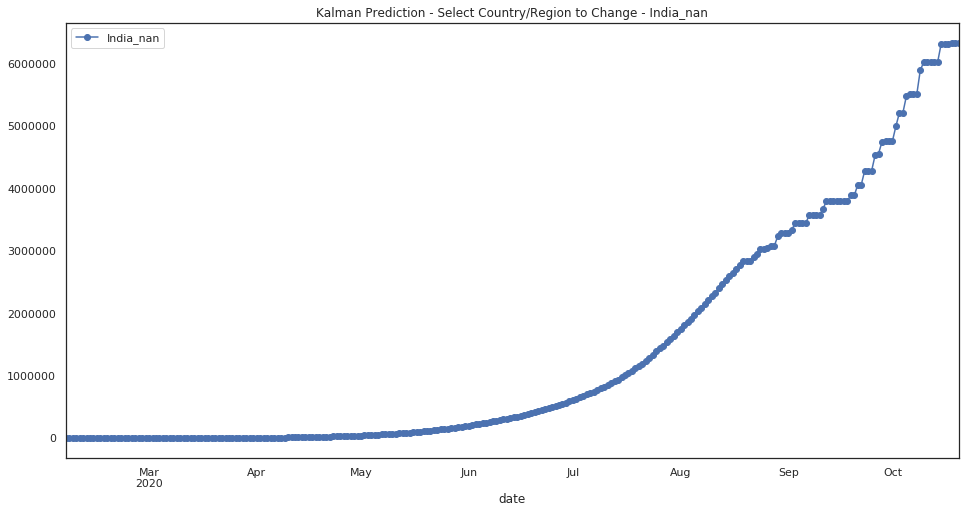

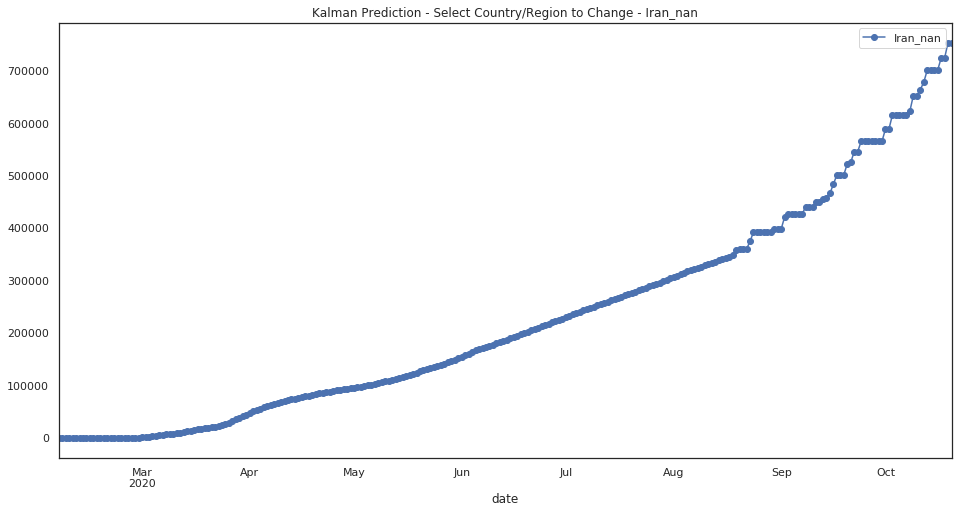

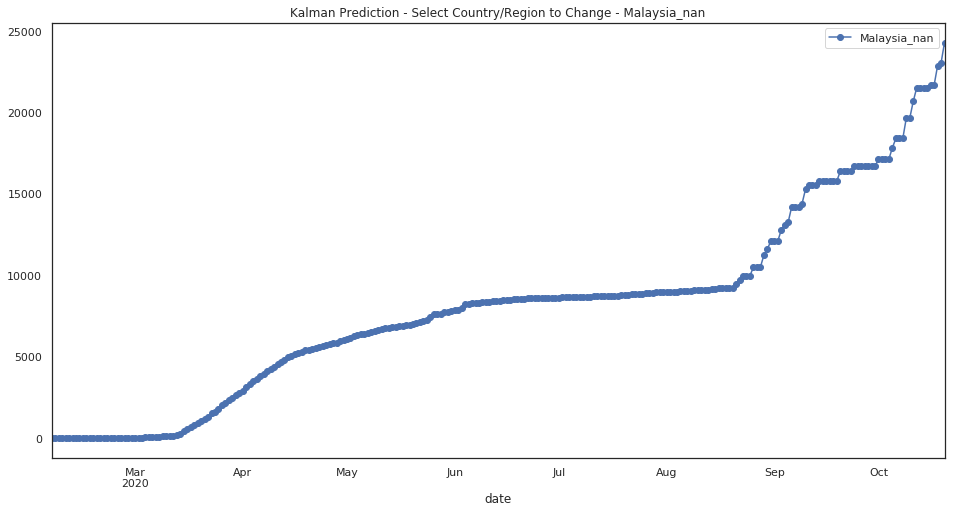

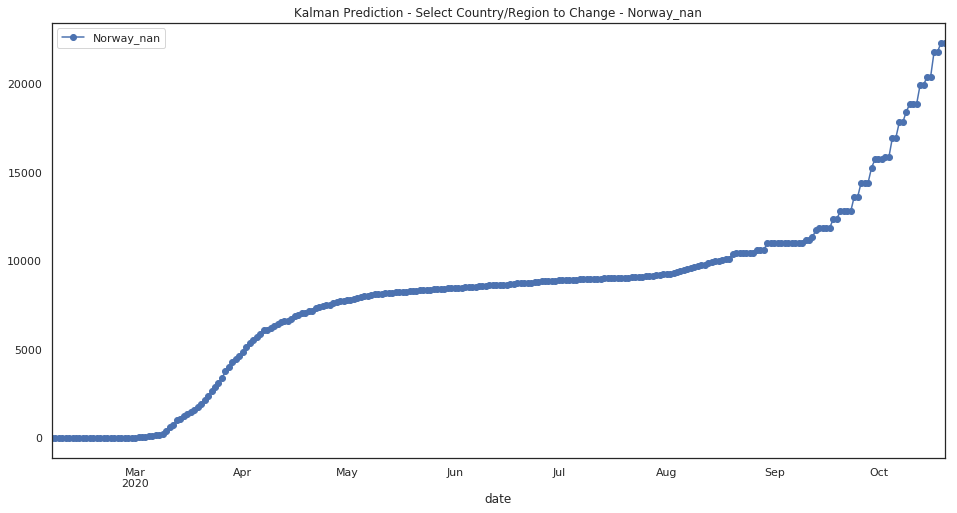

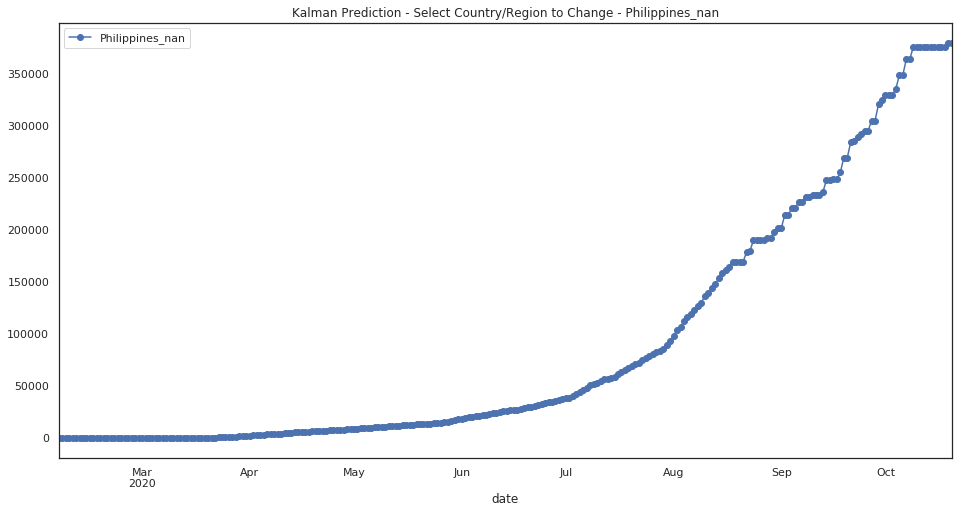

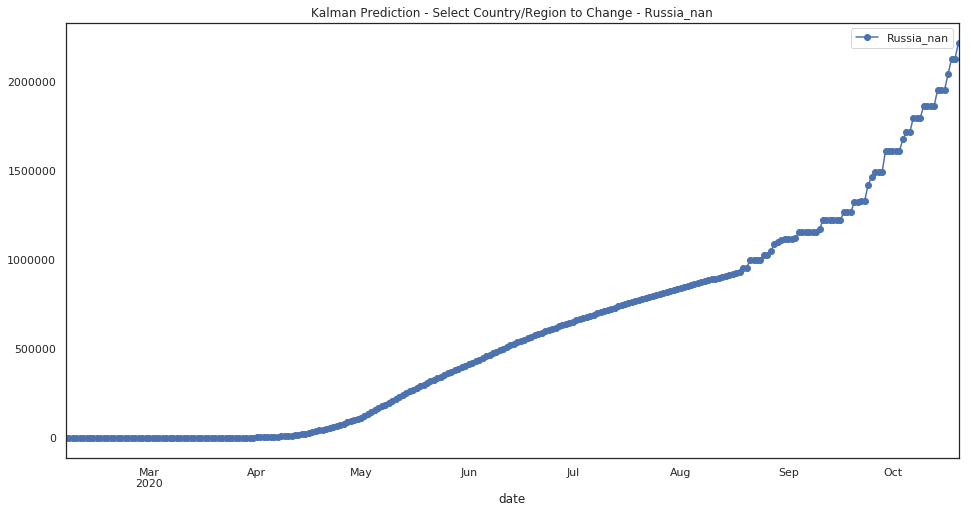

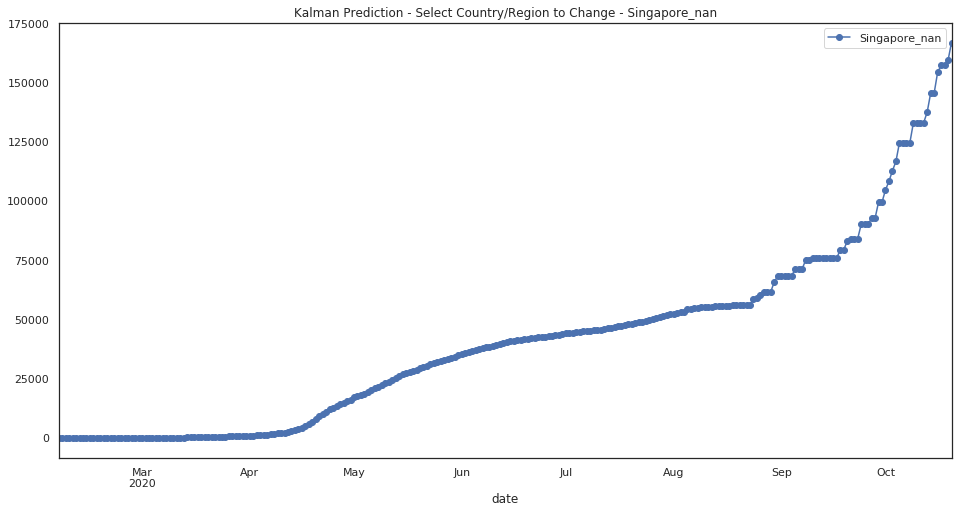

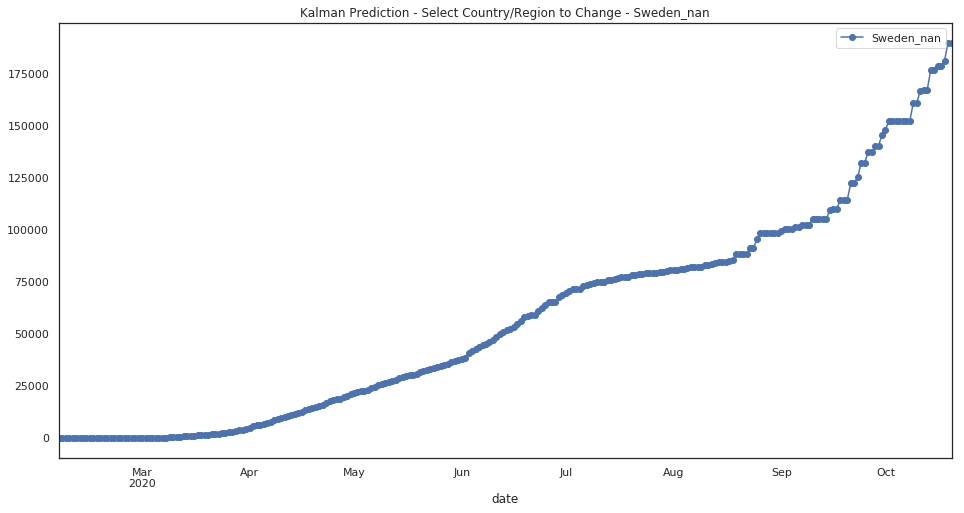

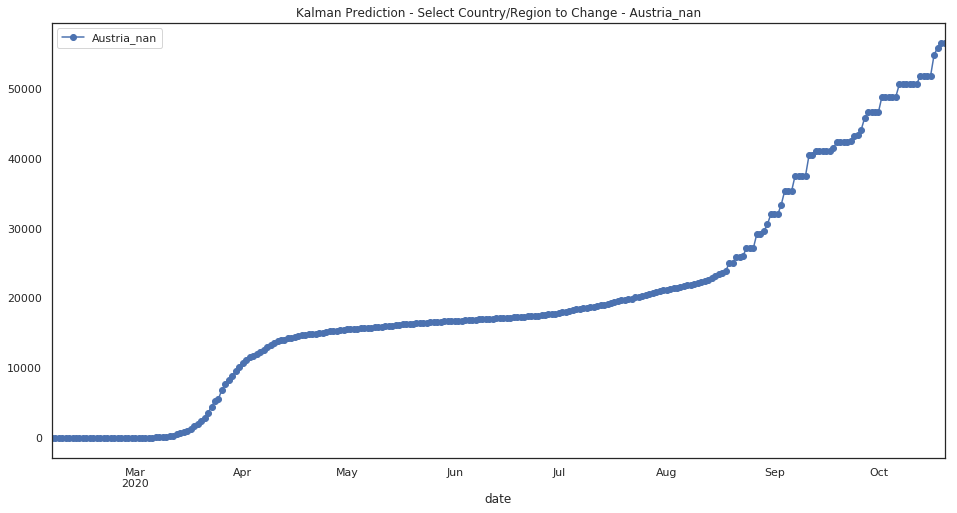

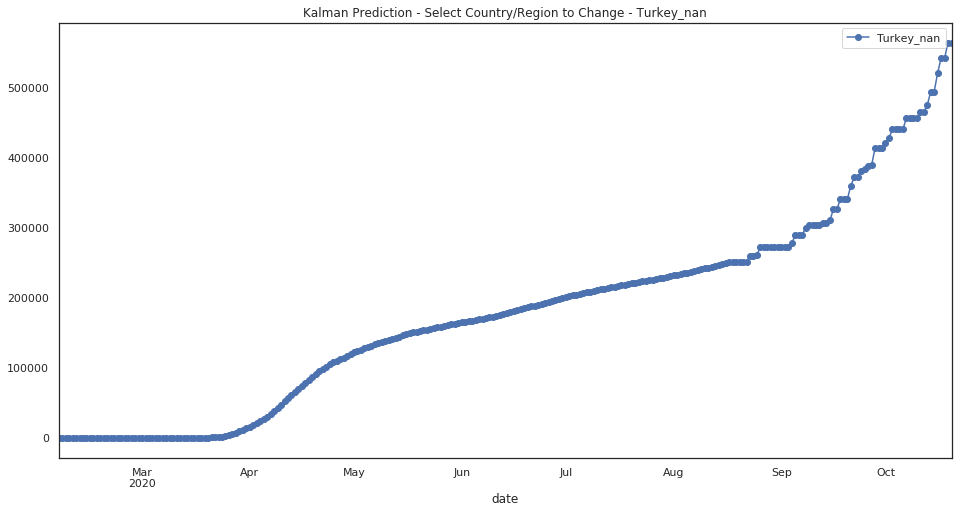

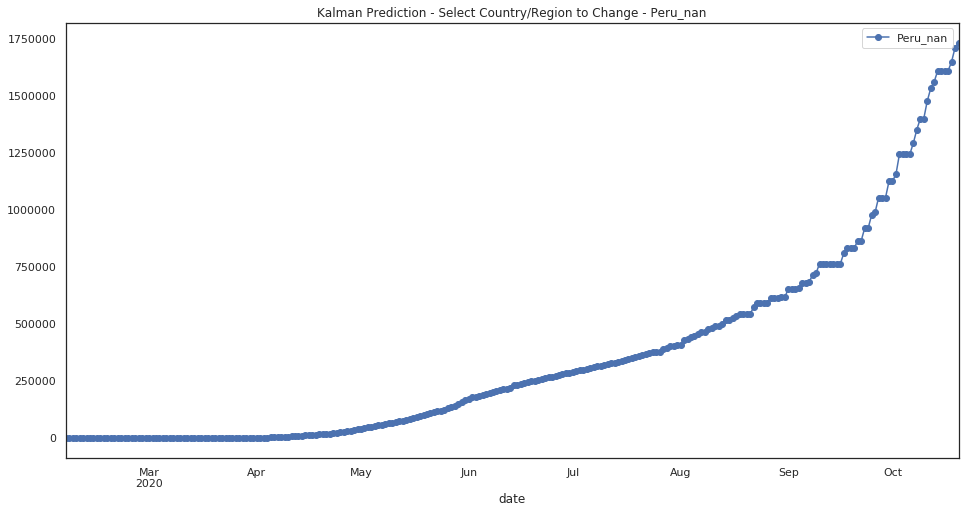

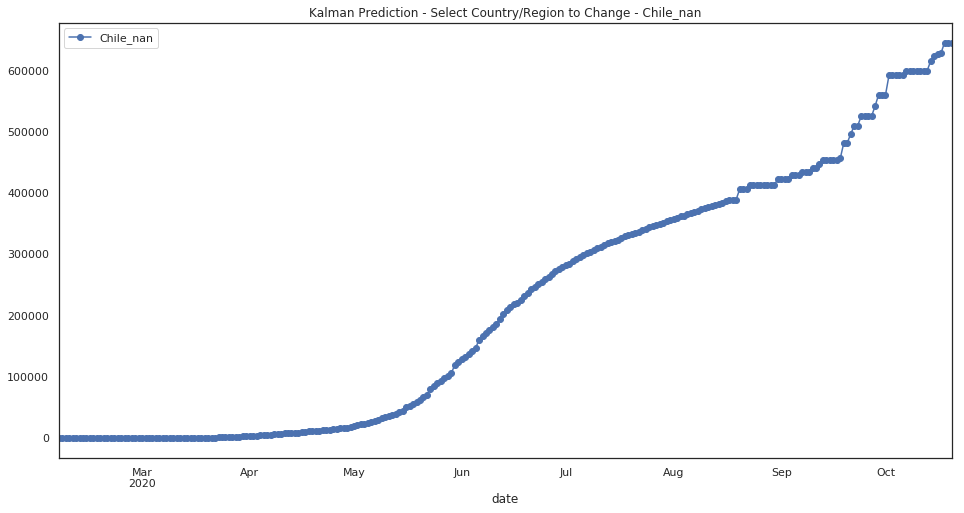

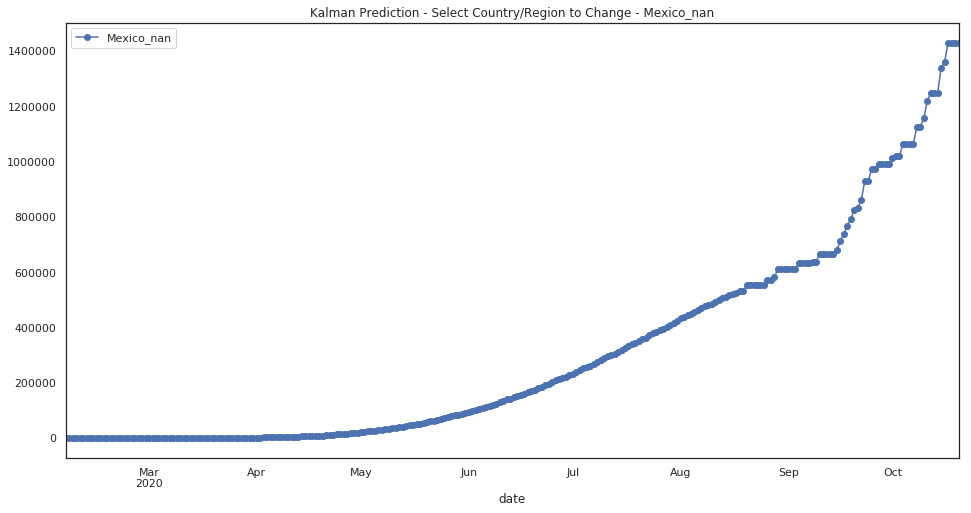

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-10-20 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN      13954772.0
Brazil_nan                                    NaN       6462958.0
India_nan                                     NaN       6337271.0
Russia_nan                                    NaN       2221588.0
Peru_nan                                      NaN       1730727.0
South Africa_nan                              NaN       1457277.0
Mexico_nan                                    NaN       1430655.0
Spain_nan                                     NaN       1402214.0
Colombia_nan                                  NaN       1082485.0
Pakistan_nan                                  NaN        961301.0
Bangladesh_nan                                NaN        958827.0
Argentina_nan                                 NaN        934723.0
Iran_nan                                      NaN        753684.0
France_nan                                    NaN        679782.0
Germany_nan                                   NaN        670499.0
Chile_nan                                     NaN        645203.0
Turkey_nan                                    NaN        564257.0
United Kingdom_nan                            NaN        551088.0
Saudi Arabia_nan                              NaN        500662.0
Italy_nan                                     NaN        482816.0
Iraq_nan                                      NaN        480335.0
Philippines_nan                               NaN        379590.0
Indonesia_nan                                 NaN        361722.0
Qatar_nan                                     NaN        289726.0
Egypt_nan                                     NaN        250986.0
Ukraine_nan                                   NaN        245342.0
Dominican Republic_nan                        NaN        217553.0
Israel_nan                                    NaN        216819.0
Panama_nan                                    NaN        211398.0
Japan_nan                                     NaN        202470.0
...                                           ...             ...
Antigua and Barbuda_nan                       NaN           152.0
Canada_Prince Edward Island                   NaN           137.0
China_Ningxia                                 NaN           116.0
Netherlands_Curacao                           NaN           106.0
Australia_Northern Territory                  NaN            78.0
Fiji_nan                                      NaN            73.0
Saint Kitts and Nevis_nan                     NaN            47.0
Saint Lucia_nan                               NaN            46.0
Laos_nan                                      NaN            46.0
Timor-Leste_nan                               NaN            45.0
France_New Caledonia                          NaN            44.0
United Kingdom_British Virgin Islands         NaN            43.0
Grenada_nan                                   NaN            39.0
France_Saint Barthelemy                       NaN            37.0
United Kingdom_Montserrat                     NaN            33.0
China_Qinghai                                 NaN            33.0
Canada_Yukon                                  NaN            31.0
Denmark_Greenland                             NaN            30.0
Canada_Grand Princess                         NaN            27.0
Dominica_nan                                  NaN            27.0
United Kingdom_Falkland Islands (Malvinas)    NaN            25.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN            24.0
Holy See_nan                                  NaN            22.0
Western Sahara_nan                            NaN            10.0
MS Zaandam_nan                                NaN             9.0
France_Saint Pierre and Miquelon              NaN             5.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princes

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06             13.0         13.0         13.0         13.0   
2020-02-07             13.0         13.0         13.0         13.0   
2020-02-08             13.0         13.0         13.0         13.0   
2020-02-09             13.0         13.0         13.0         13.0   
2020-02-10             13.0         13.0         13.0         13.0   
2020-02-11             13.0         13.0         13.0         13.0   
2020-02-12             13.0         13.0         13.0         13.0   
2020-02-13             13.0         13.0         13.0         13.0   
2020-02-14             13.0         13.0         13.0         13.0   
2020-02-15             13.0         13.0         13.0         13.0   
2020-02-16             13.0         13.0         13.0         13.0   
2020-02-17             13.0         13.0         13.0         13.0   
2020-02-18             40.0         13.0         47.0         13.0   
2020-02-19             28.0         13.0         50.0         13.0   
2020-02-20             35.0         13.0         51.0         13.0   
2020-02-21             41.0         13.0         53.0         13.0   
2020-02-22             40.0         13.0         51.0         13.0   
2020-02-23             40.0         13.0         48.0         13.0   
2020-02-24             44.0         13.0         51.0         13.0   
2020-02-25             45.0         13.0         50.0         13.0   
2020-02-26             20.0         13.0         51.0         13.0   
2020-02-27             40.0         13.0         46.0         13.0   
2020-02-28             23.0         13.0         41.0         13.0   
2020-02-29             25.0         13.0         45.0         13.0   
2020-03-01             27.0         13.0         45.0         13.0   
2020-03-02             29.0         13.0         44.0         13.0   
2020-03-03             30.0         13.0         32.0         15.0   
2020-03-04             22.0         13.0         51.0          5.0   
2020-03-05             21.0         13.0         84.0          5.0   
2020-03-06             23.0         13.0         76.0          8.0   
...                     ...          ...          ...          ...   
2020-09-22          49388.0      17762.0      63163.0       1545.0   
2020-09-23          51884.0      17645.0      67172.0       1517.0   
2020-09-24          51517.0      18586.0      65400.0       1540.0   
2020-09-25          51667.0      18249.0      71521.0       1555.0   
2020-09-26          55597.0      20546.0      69173.0       1555.0   
2020-09-27          54871.0      20476.0      72856.0       1541.0   
2020-09-28          54898.0      20781.0      78506.0       1591.0   
2020-09-29          55608.0      20172.0      77412.0       1562.0   
2020-09-30          55149.0      21760.0      77556.0       1529.0   
2020-10-01          55090.0      22936.0      76952.0       1640.0   
2020-10-02          54867.0      22482.0      79350.0       1622.0   
2020-10-03          54070.0      22766.0      83165.0       1622.0   
2020-10-04          54175.0      22184.0      80082.0       1639.0   
2020-10-05          54061.0      24821.0      88707.0       1630.0   
2020-10-06          55501.0      25308.0      87554.0       1618.0   
2020-10-07          55048.0      24417.0      86343.0       1656.0   
2020-10-08          56931.0      26383.0      91870.0       1632.0   
2020-10-09          56803.0      25408.0      90393.0       1619.0   
2020-10-10          56774.0      28201.0      87995.0       1665.0   
2020-10-11          57242.0      26927.0      92218.0       1658.0   
2020-10-12          56378.0      29440.0      94345.0       1646.0   
2020-10-13          57794.0      29610.0      92615.0       1666.0   
2020-10-14          59753.0      31523.0     102018.0       1721.0   
2020-10-15          62425.0      30295.0     100227.0       1742.0   
2020-10-16

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'Russia_nan',
 'Peru_nan',
 'South Africa_nan',
 'Mexico_nan',
 'Spain_nan',
 'Colombia_nan',
 'Pakistan_nan',
 'Bangladesh_nan',
 'Argentina_nan',
 'Iran_nan',
 'France_nan',
 'Germany_nan',
 'Chile_nan',
 'Turkey_nan',
 'United Kingdom_nan',
 'Saudi Arabia_nan',
 'Italy_nan',
 'Iraq_nan',
 'Philippines_nan',
 'Indonesia_nan',
 'Qatar_nan',
 'Egypt_nan',
 'Ukraine_nan',
 'Dominican Republic_nan',
 'Israel_nan',
 'Panama_nan',
 'Japan_nan',
 'Romania_nan',
 'Bolivia_nan',
 'Ecuador_nan',
 'Sweden_nan',
 'Kazakhstan_nan',
 'Singapore_nan',
 'Guatemala_nan',
 'Belgium_nan',
 'Oman_nan',
 'Portugal_nan',
 'Poland_nan',
 'United Arab Emirates_nan',
 'Canada_Quebec',
 'Kuwait_nan',
 'China_Hubei',
 'Belarus_nan',
 'Armenia_nan',
 'Ethiopia_nan',
 'Bahrain_nan',
 'Honduras_nan',
 'Kenya_nan',
 'Netherlands_nan',
 'Algeria_nan',
 'Canada_Ontario',
 'Ghana_nan',
 'Nigeria_nan',
 'Nepal_nan',
 'Morocco_nan',
 'Kyrgyzstan_nan',
 'Azerbaijan_nan

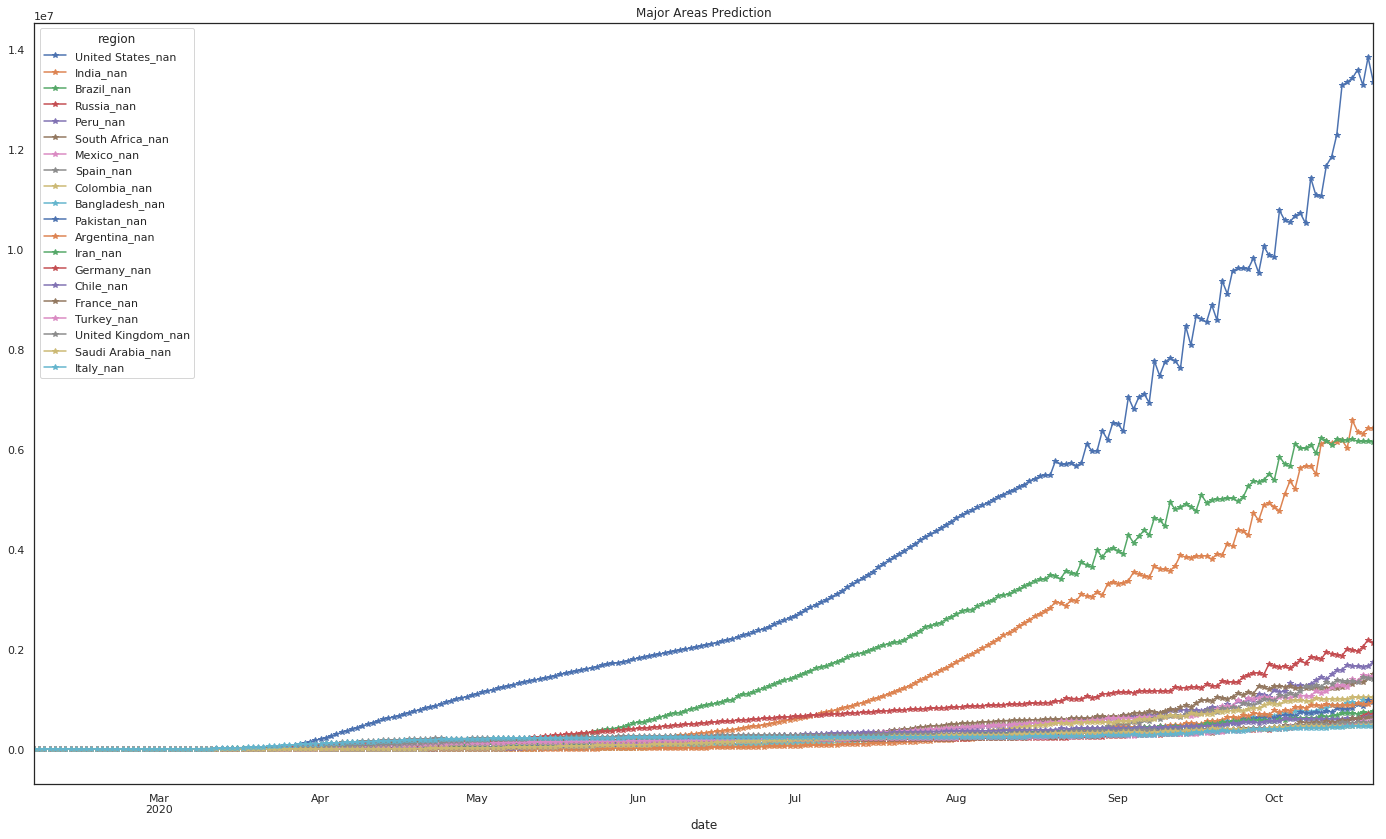

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

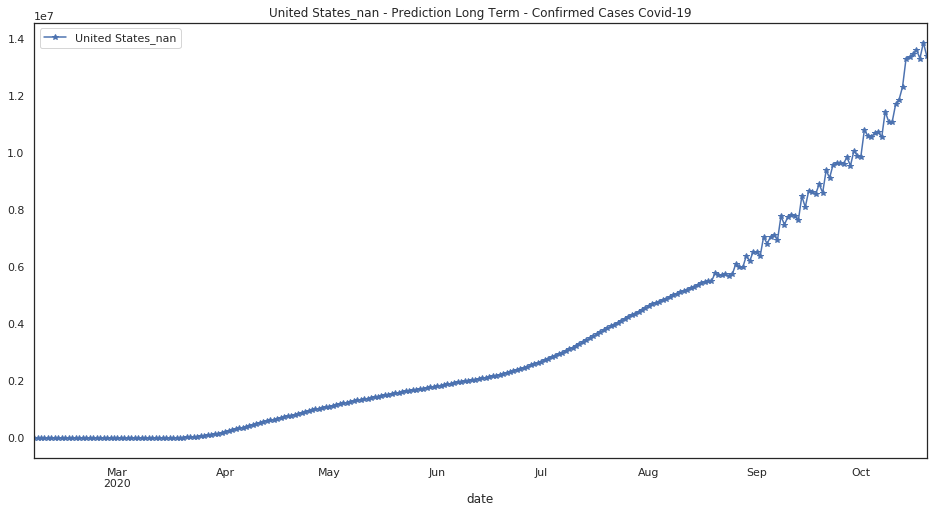

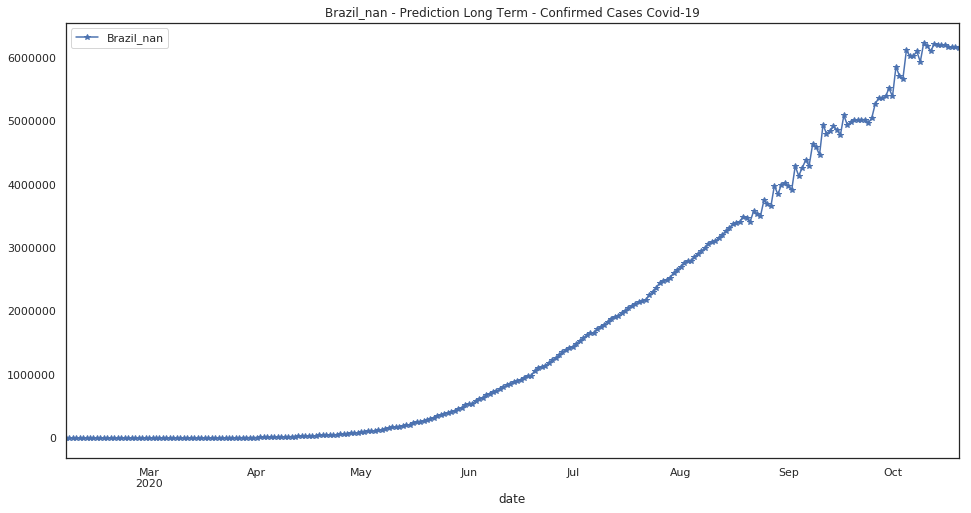

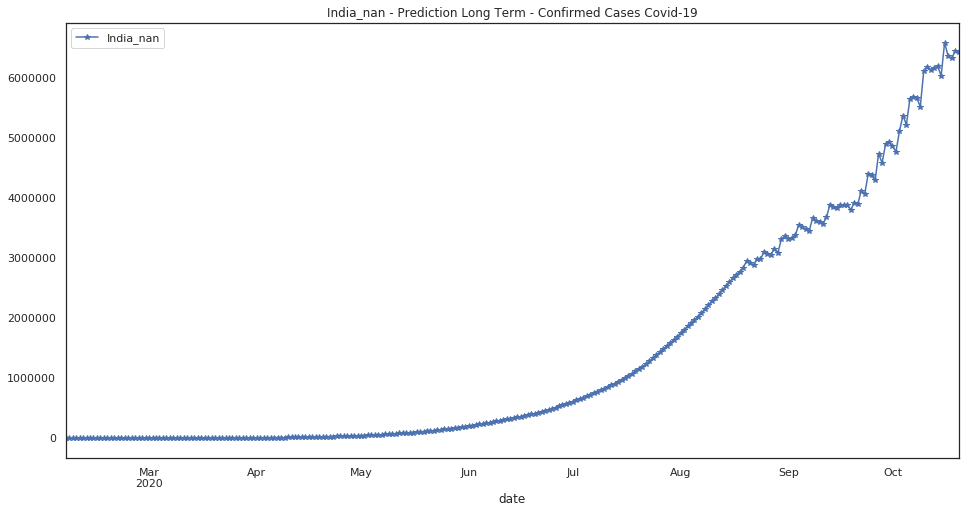

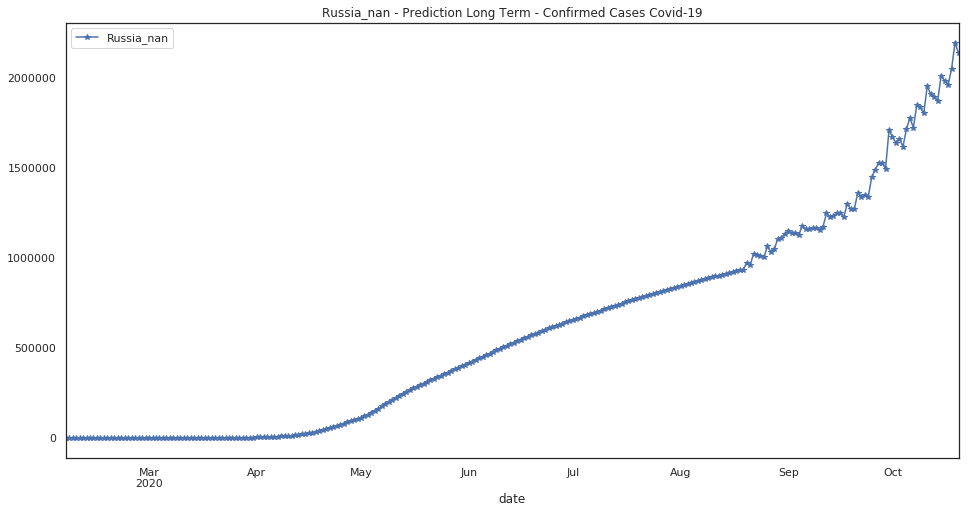

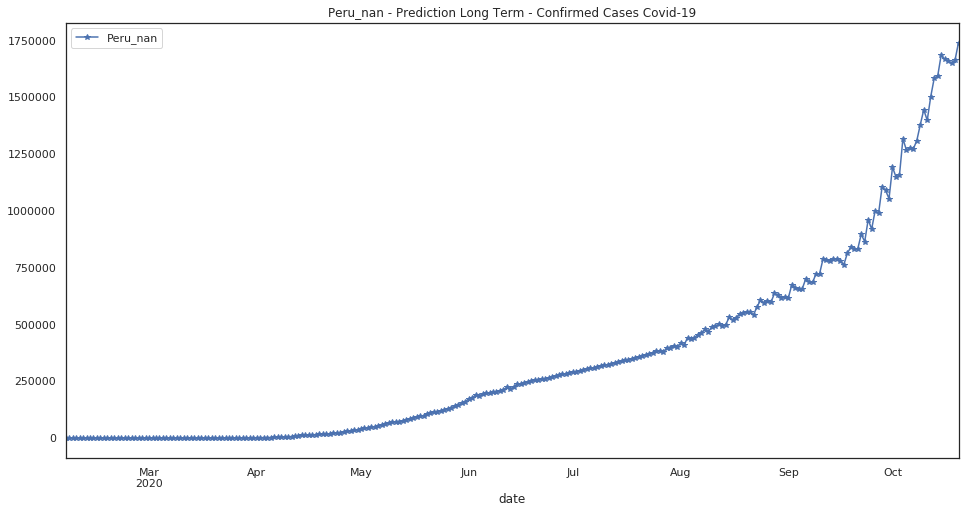

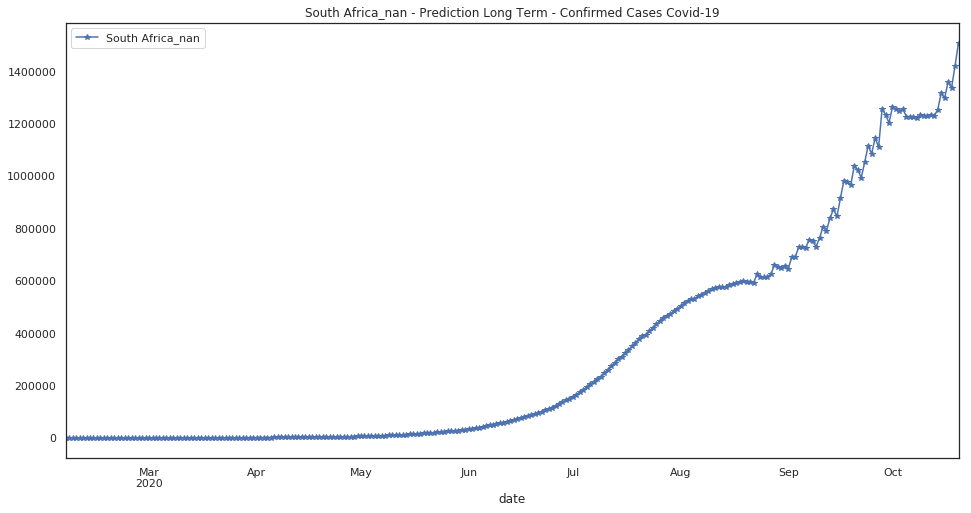

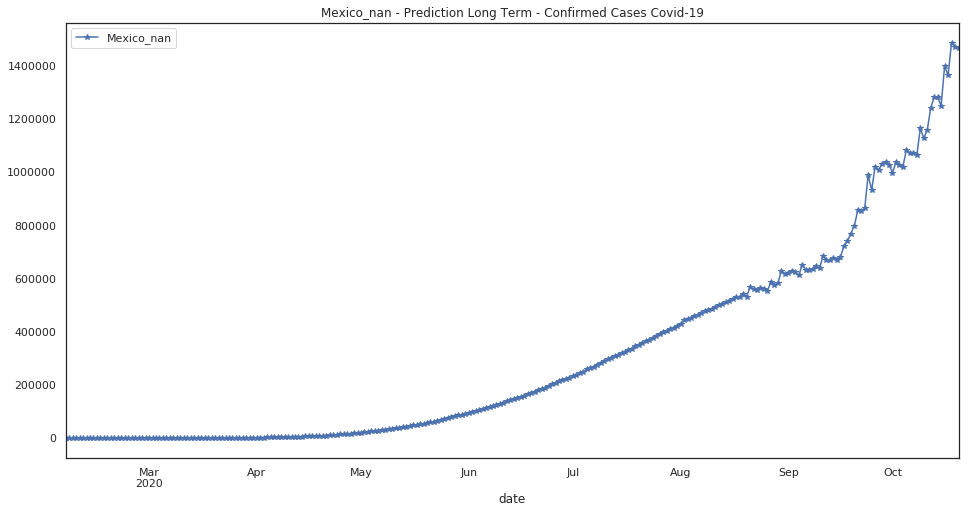

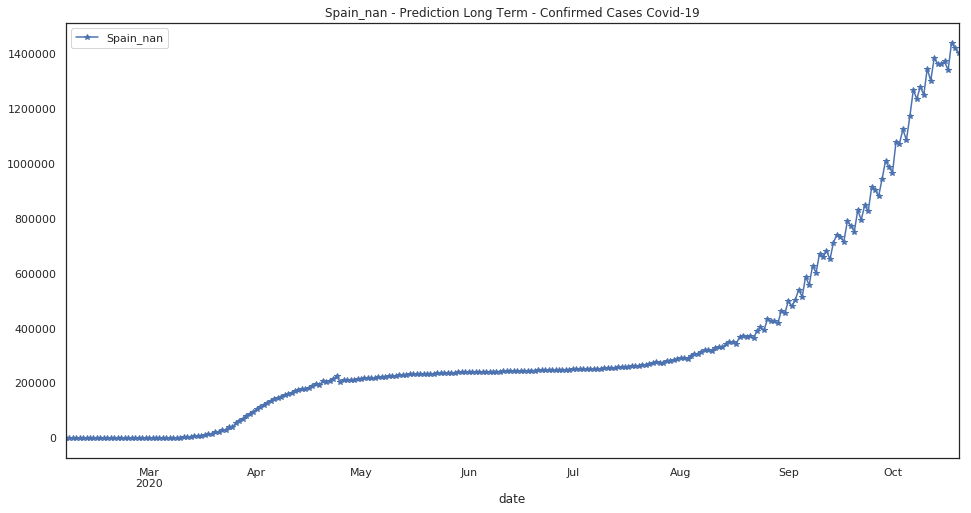

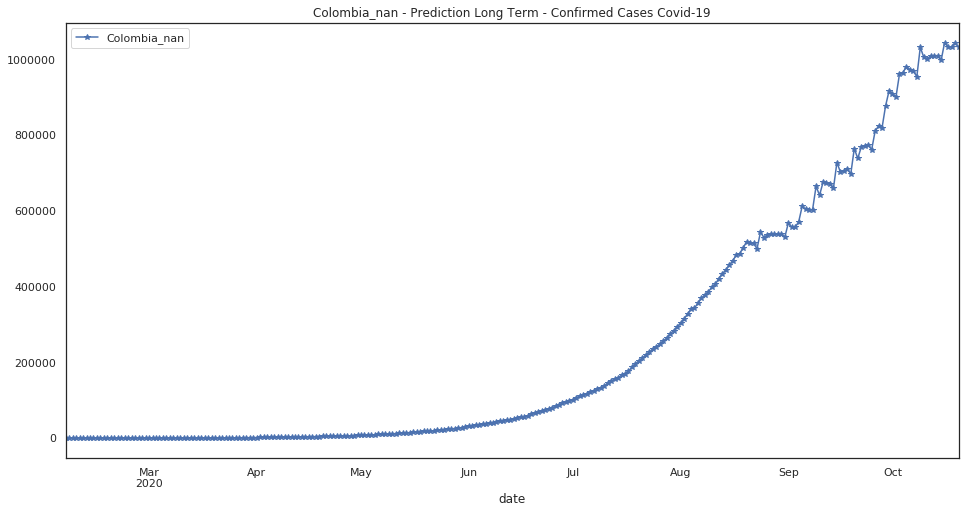

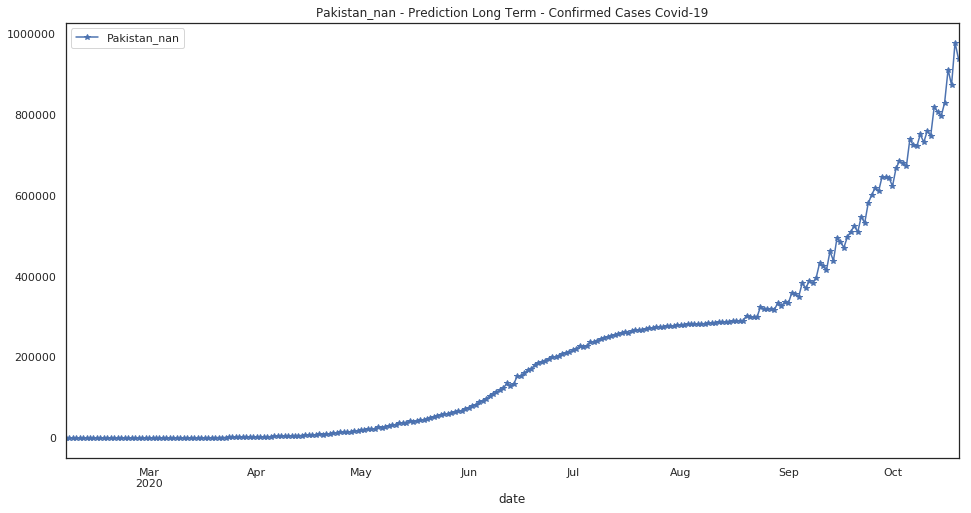

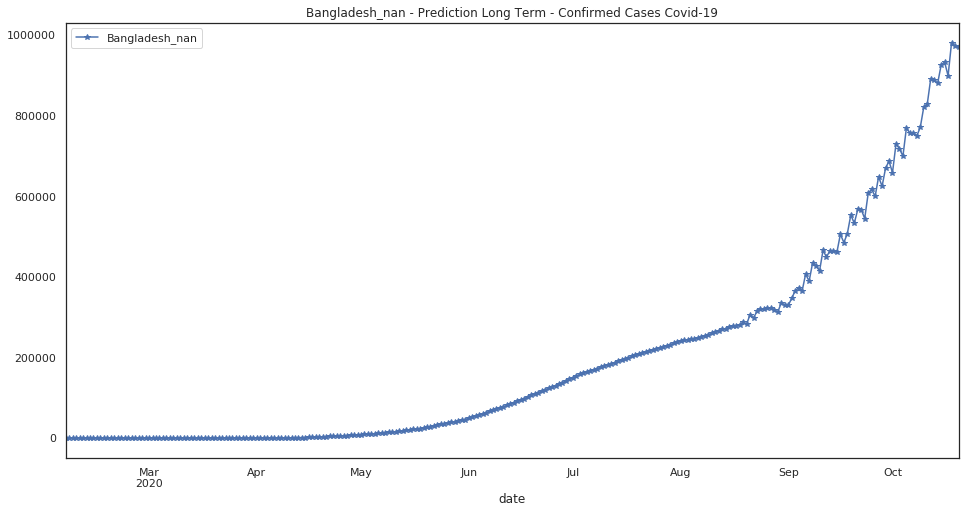

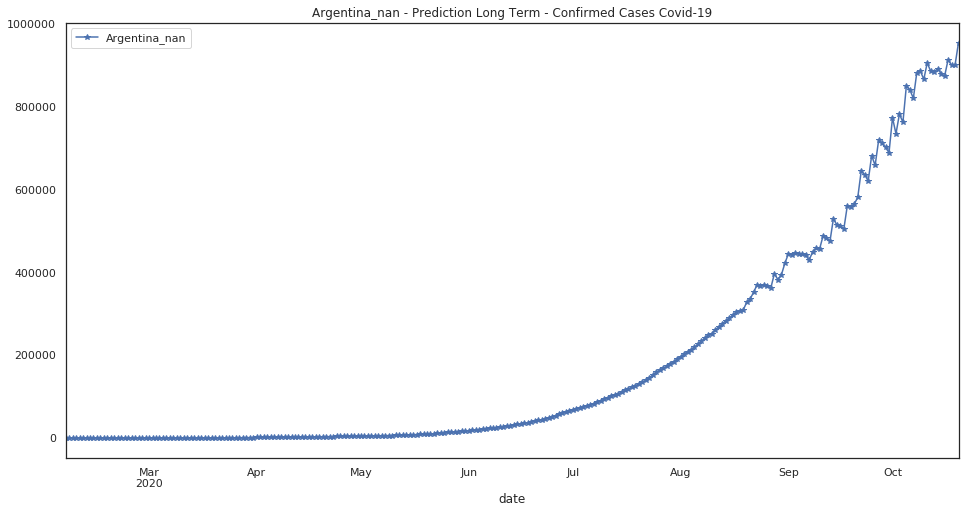

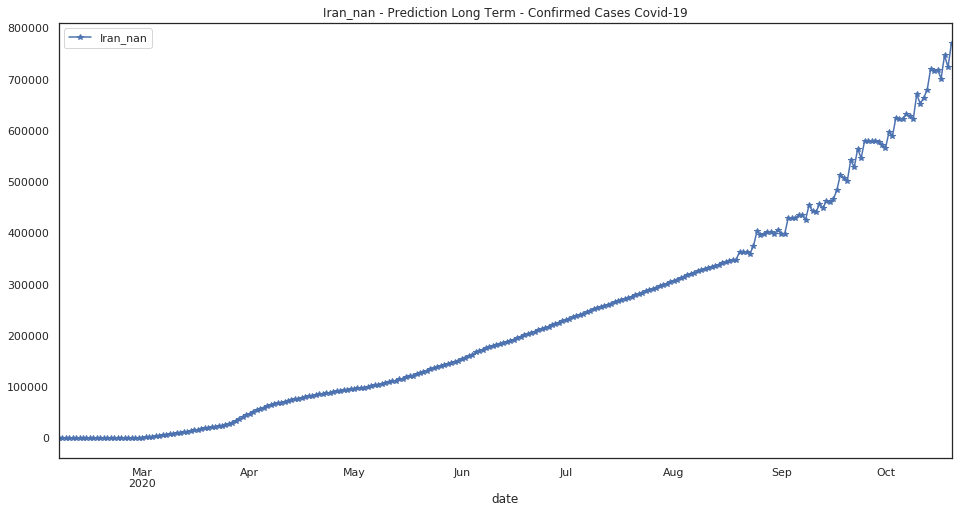

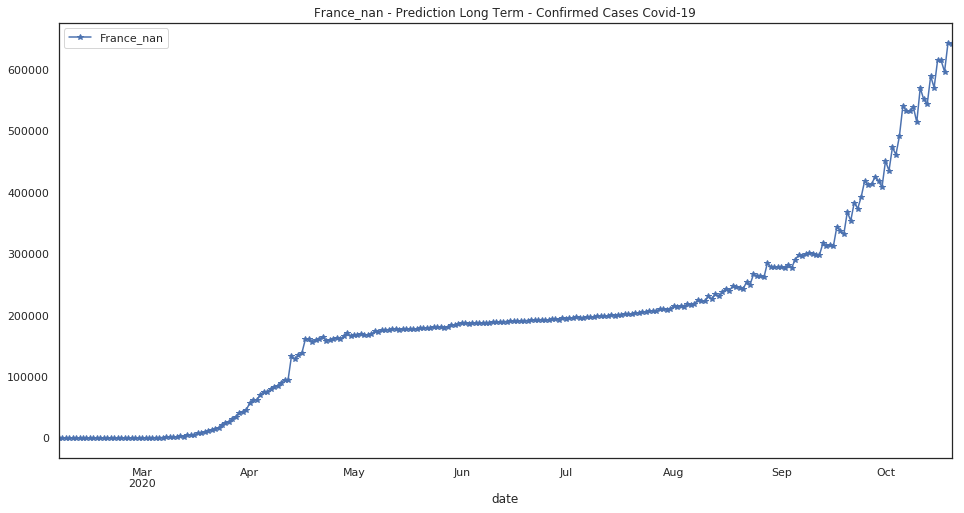

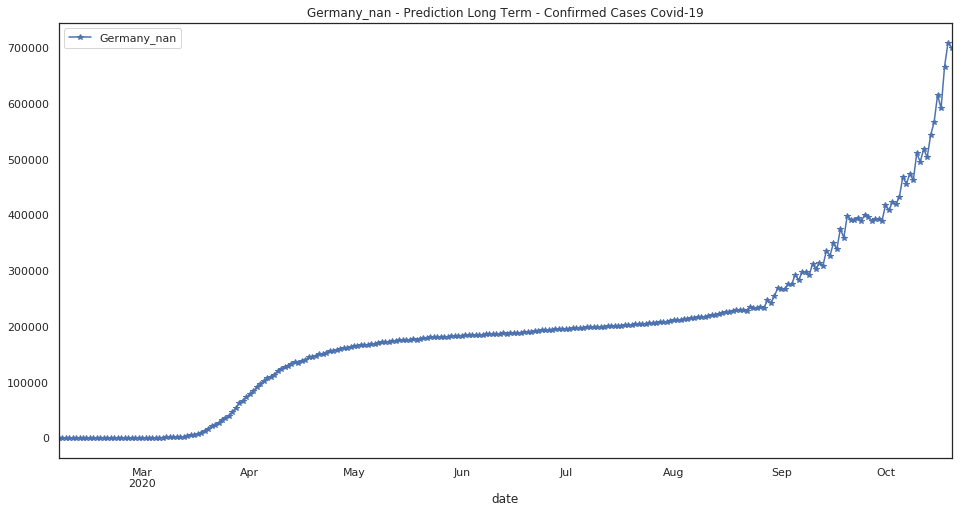

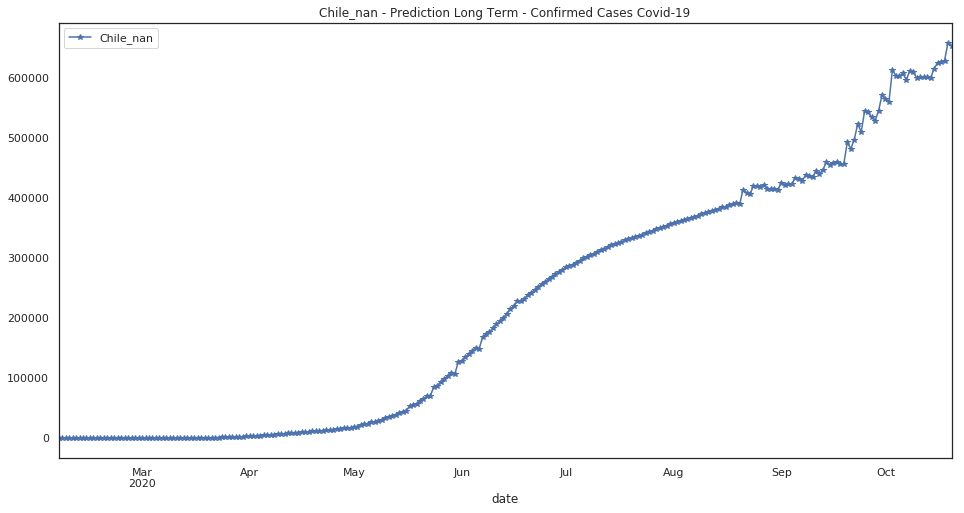

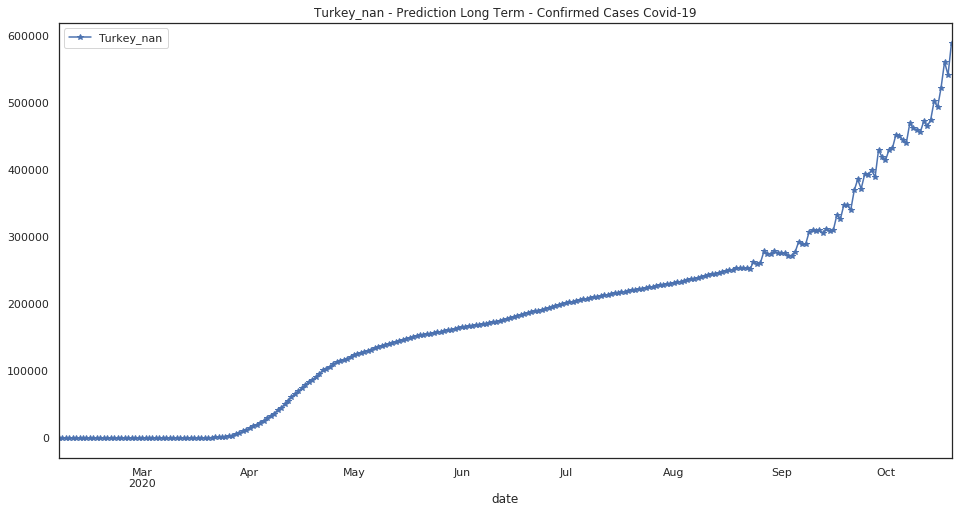

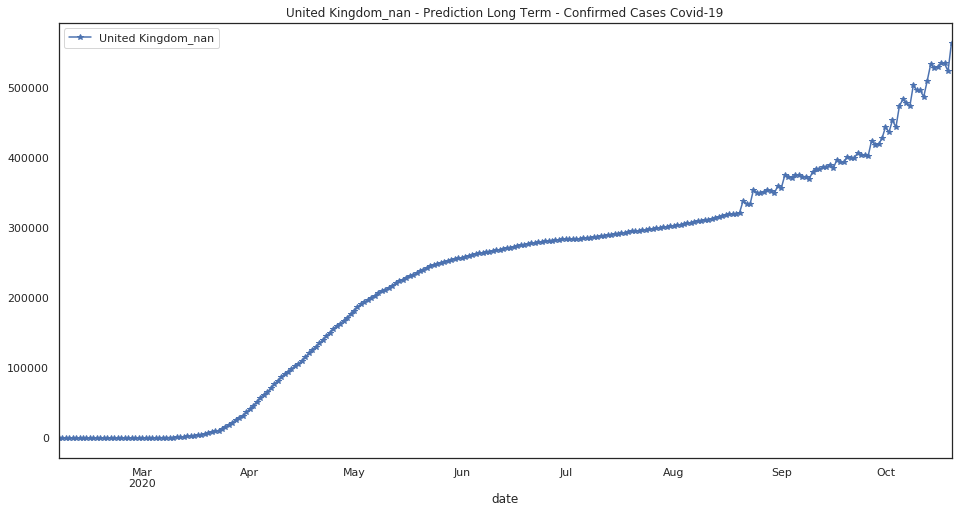

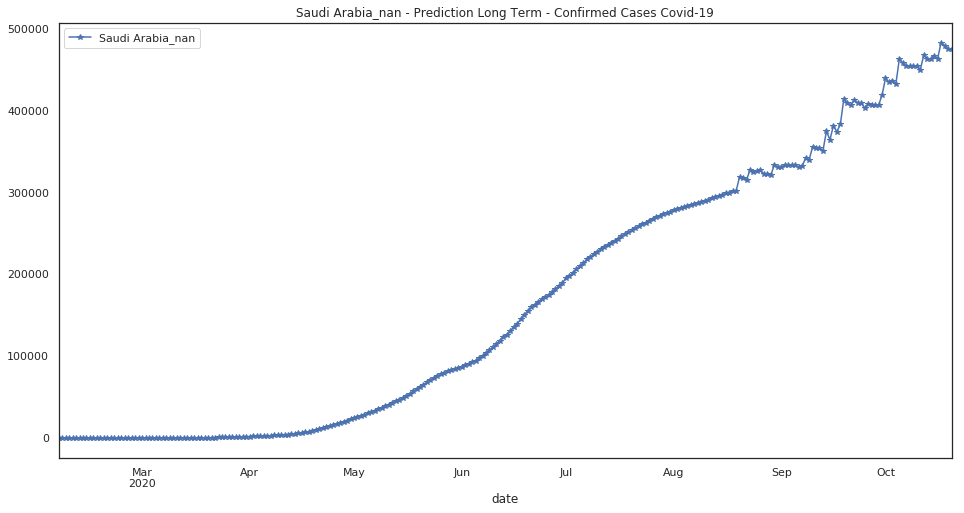

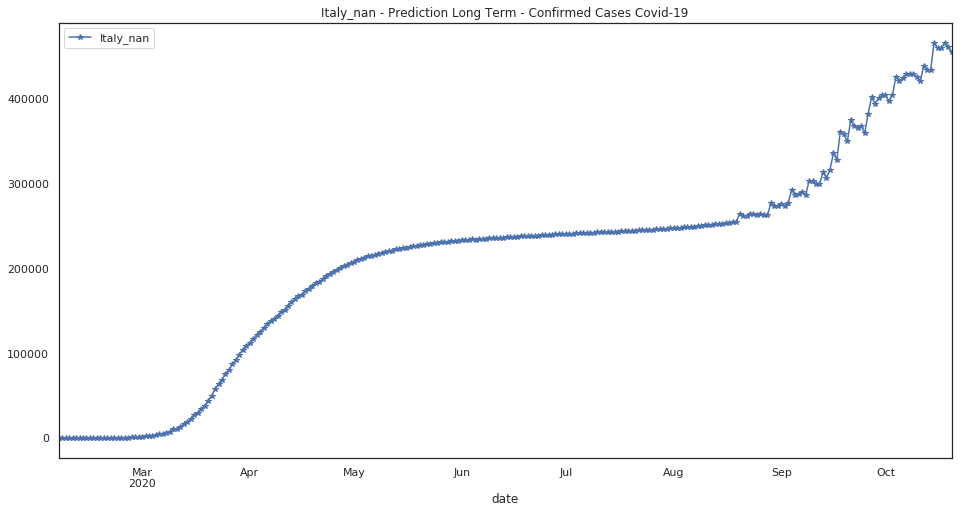

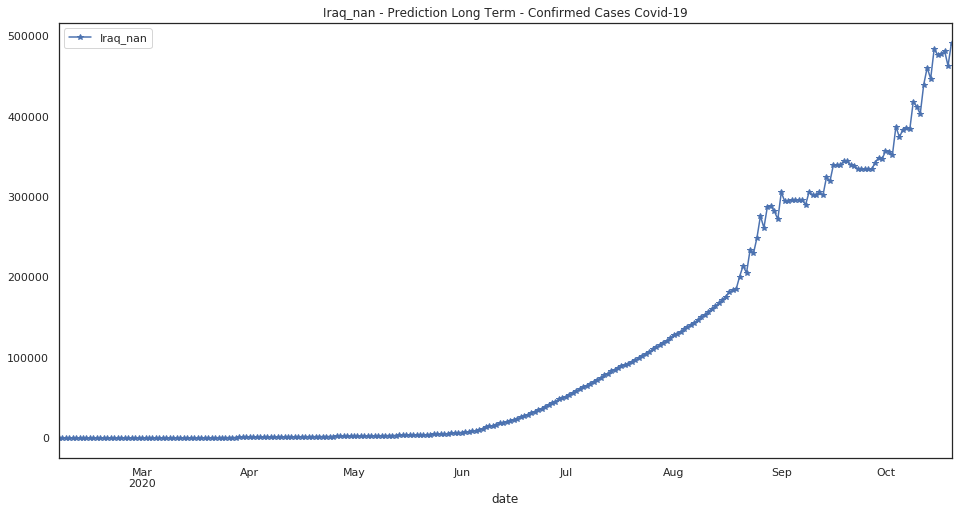

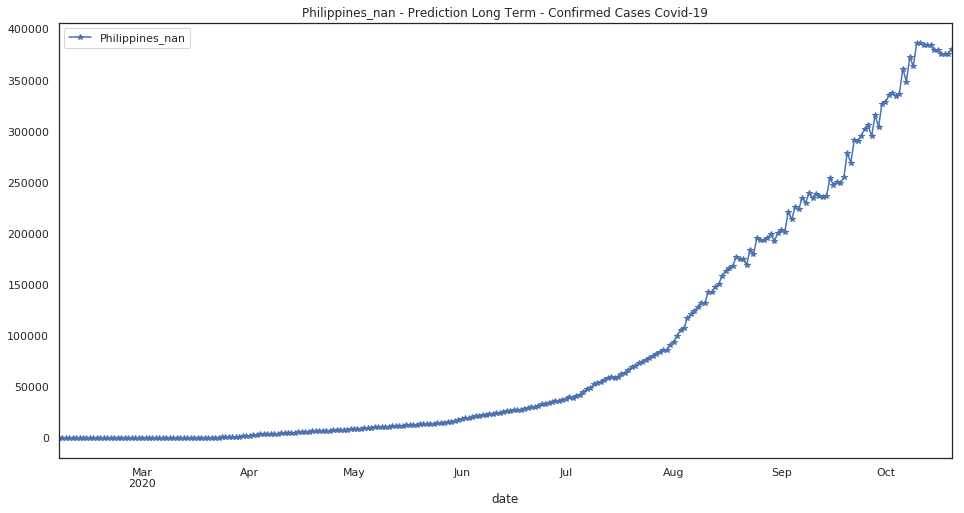

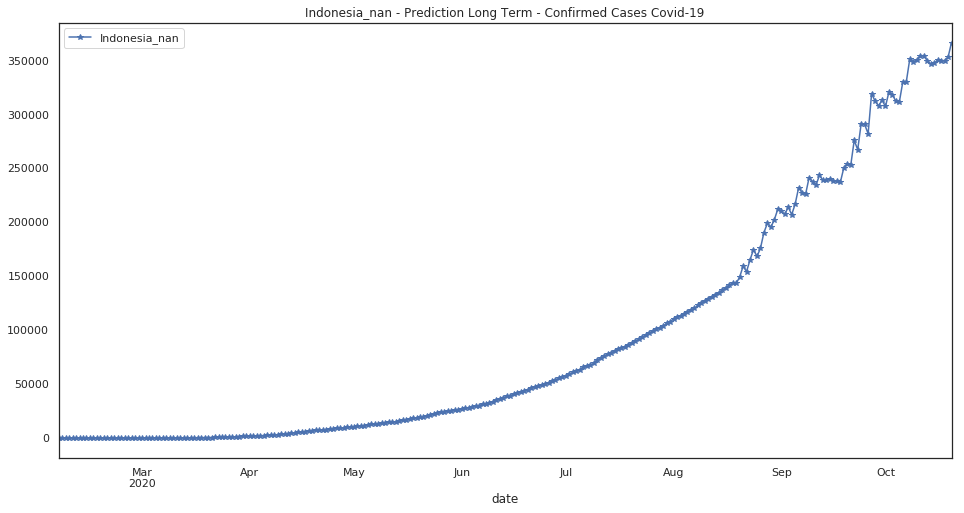

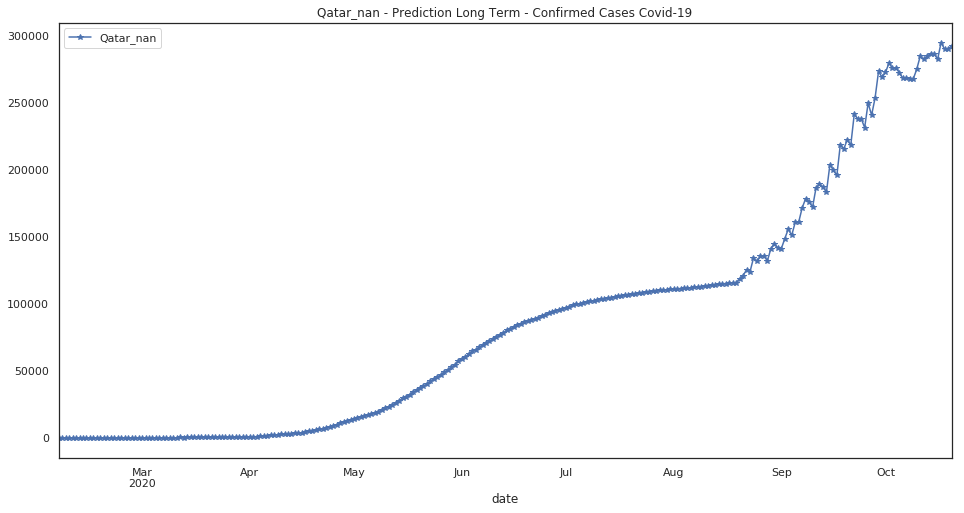

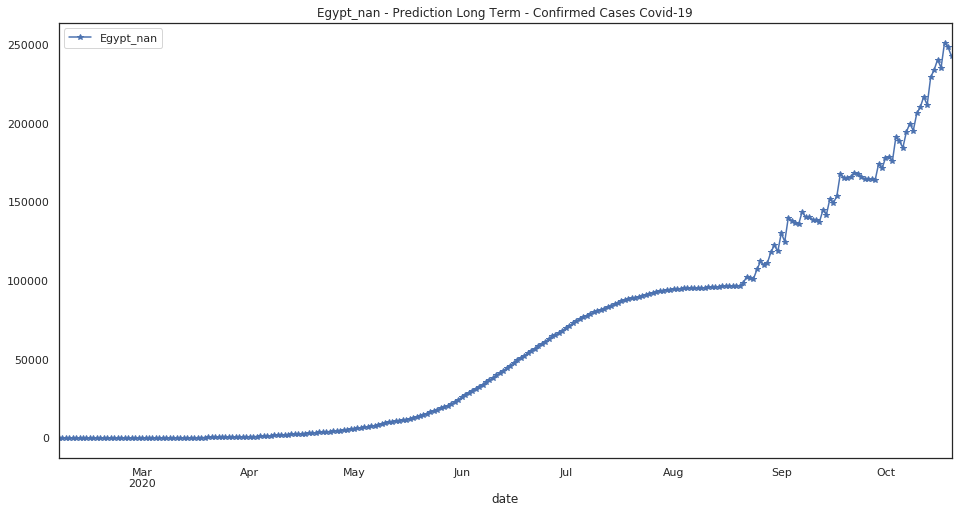

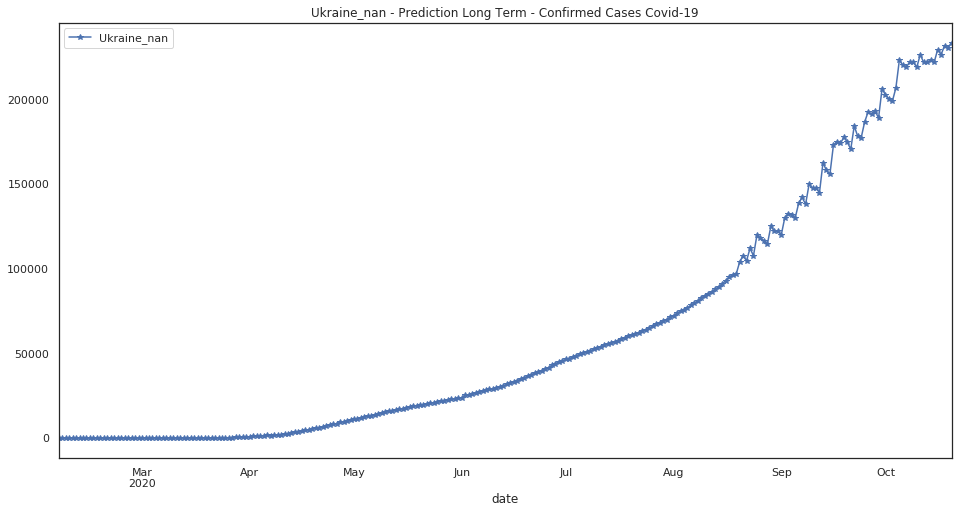

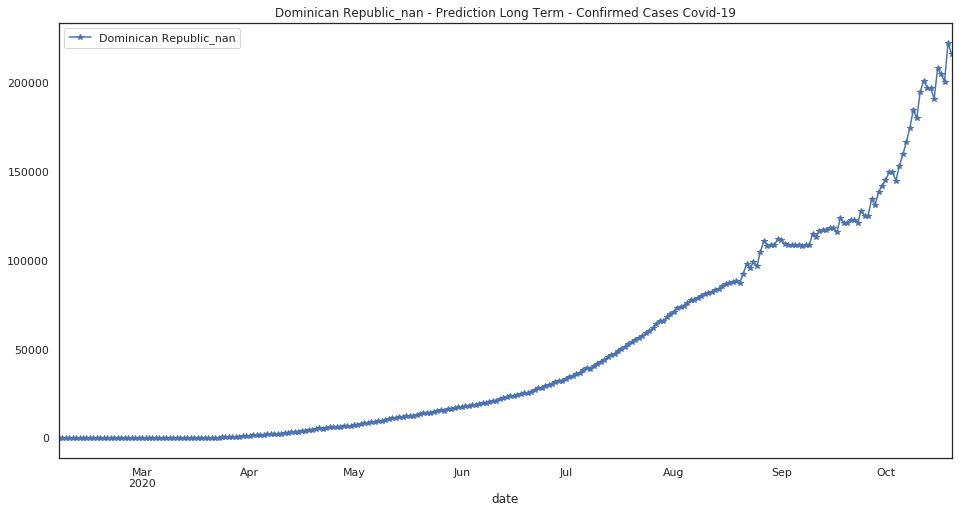

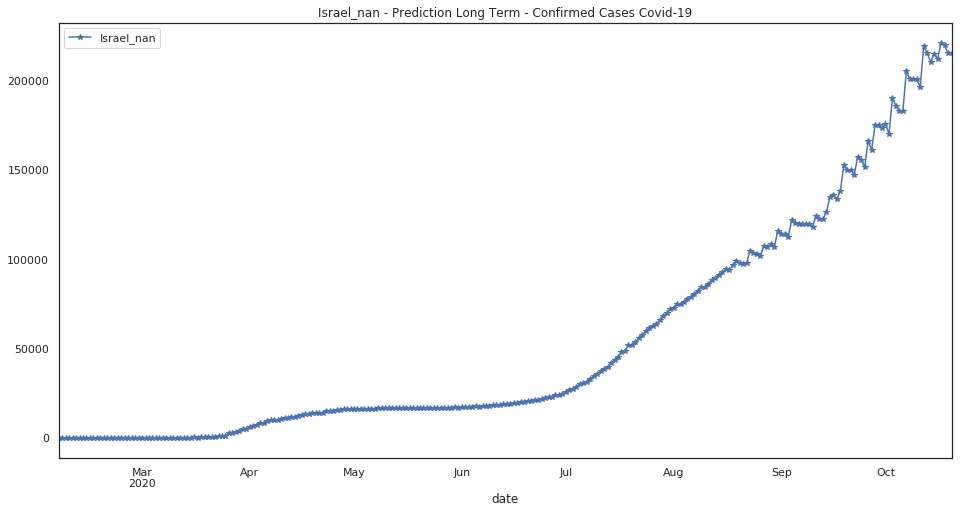

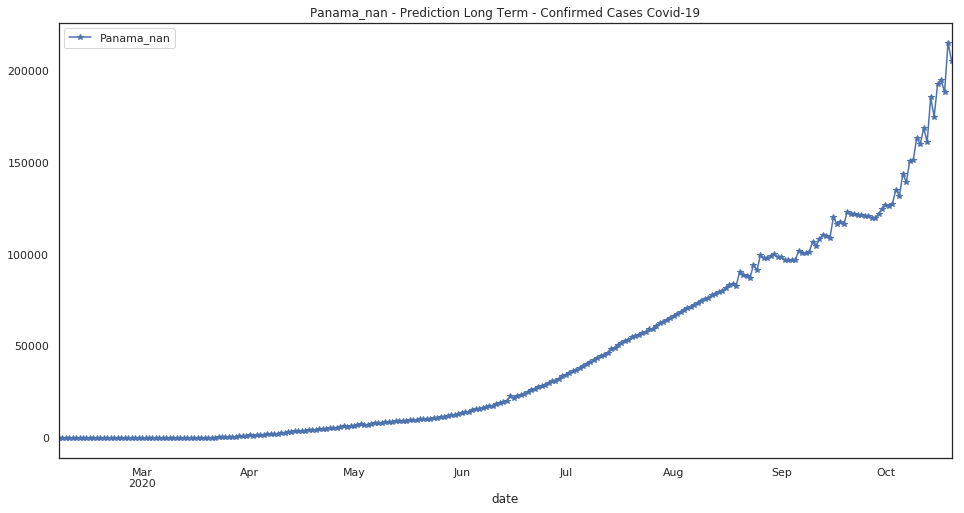

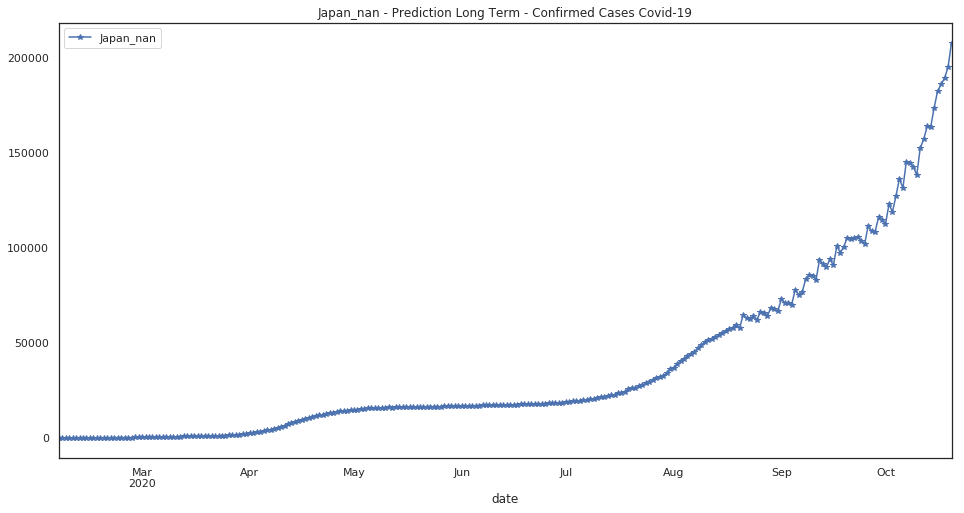

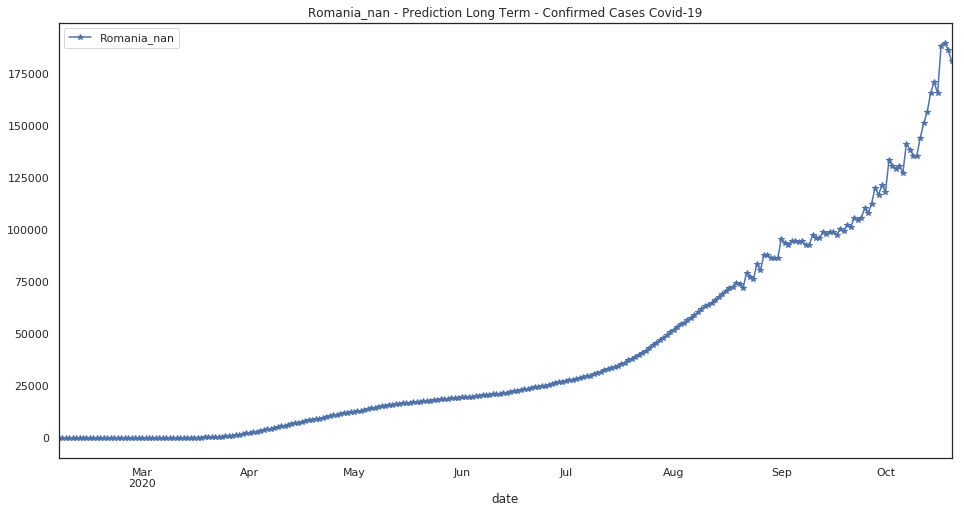

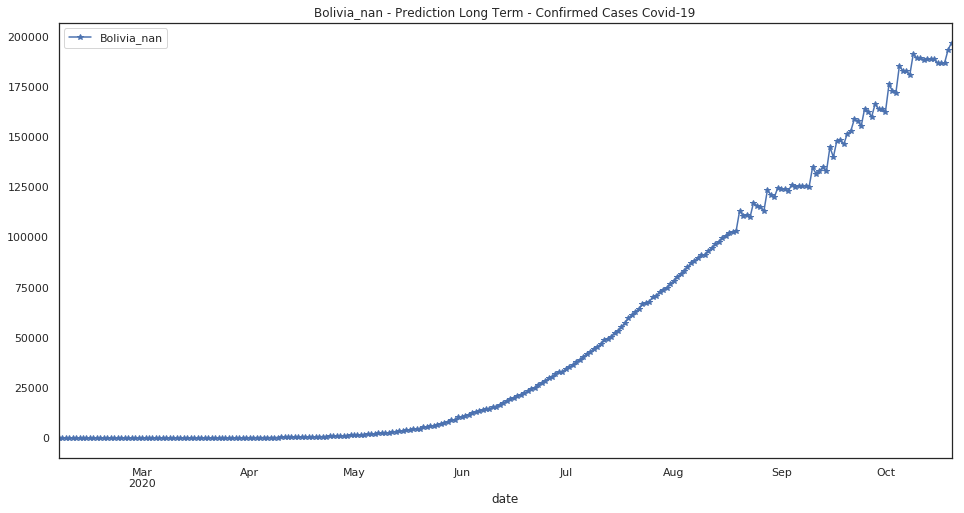

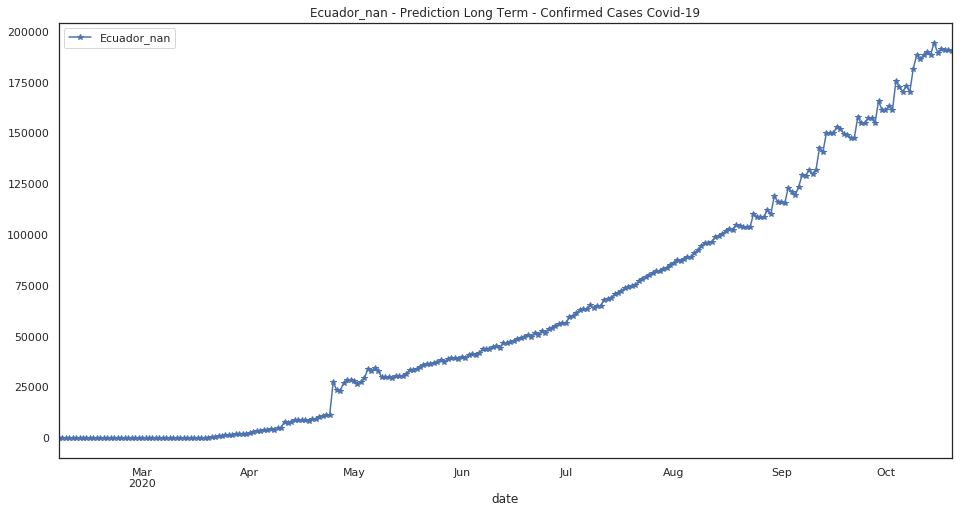

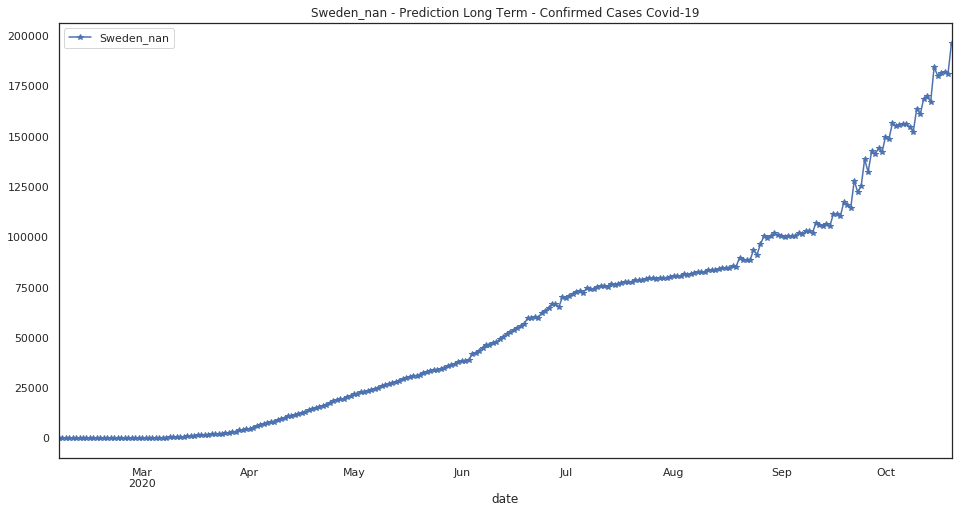

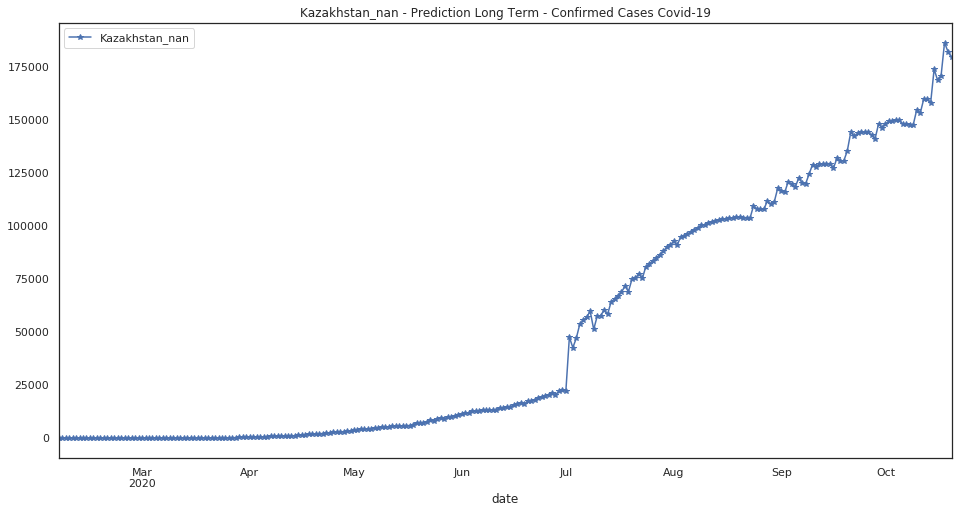

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

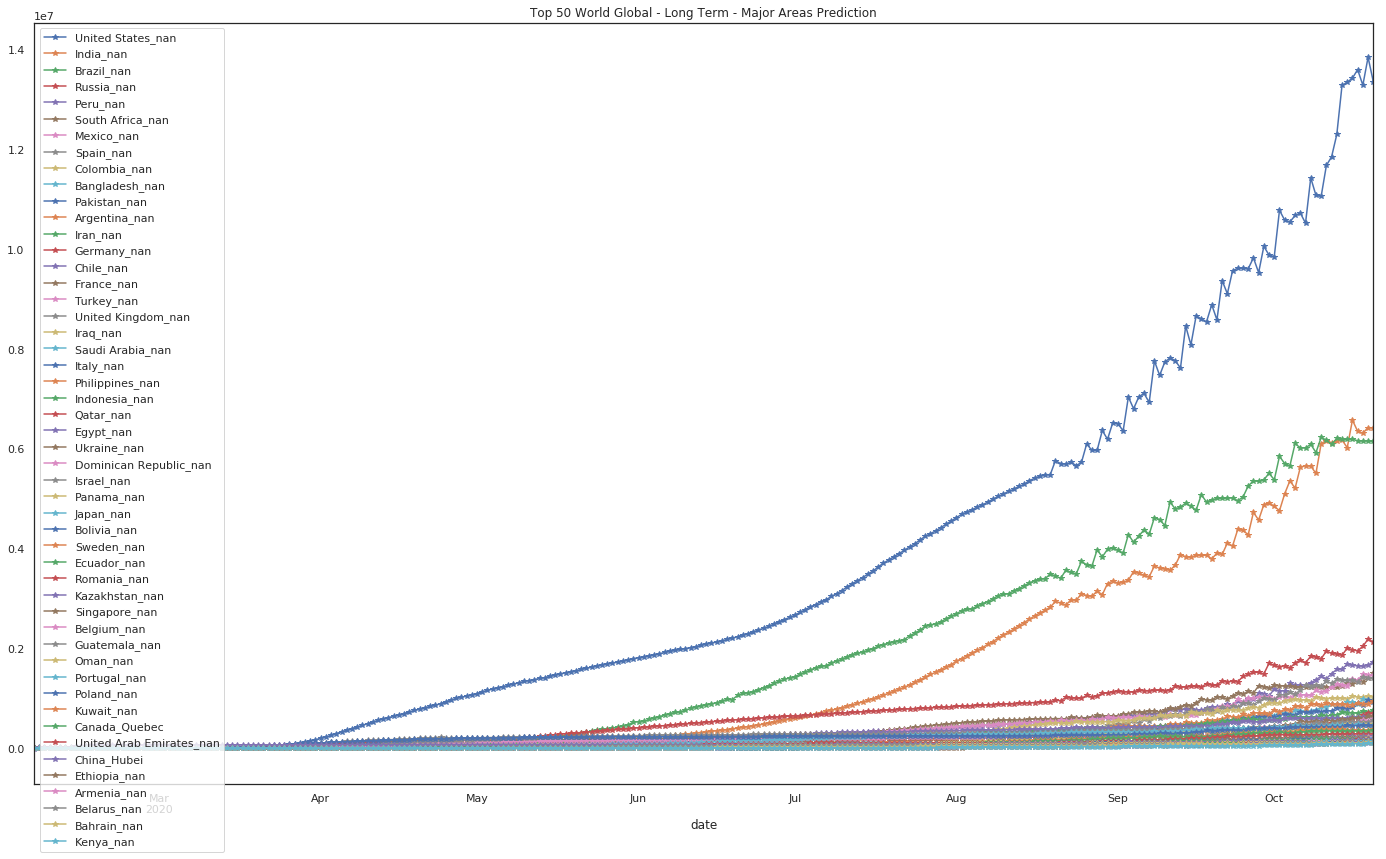

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

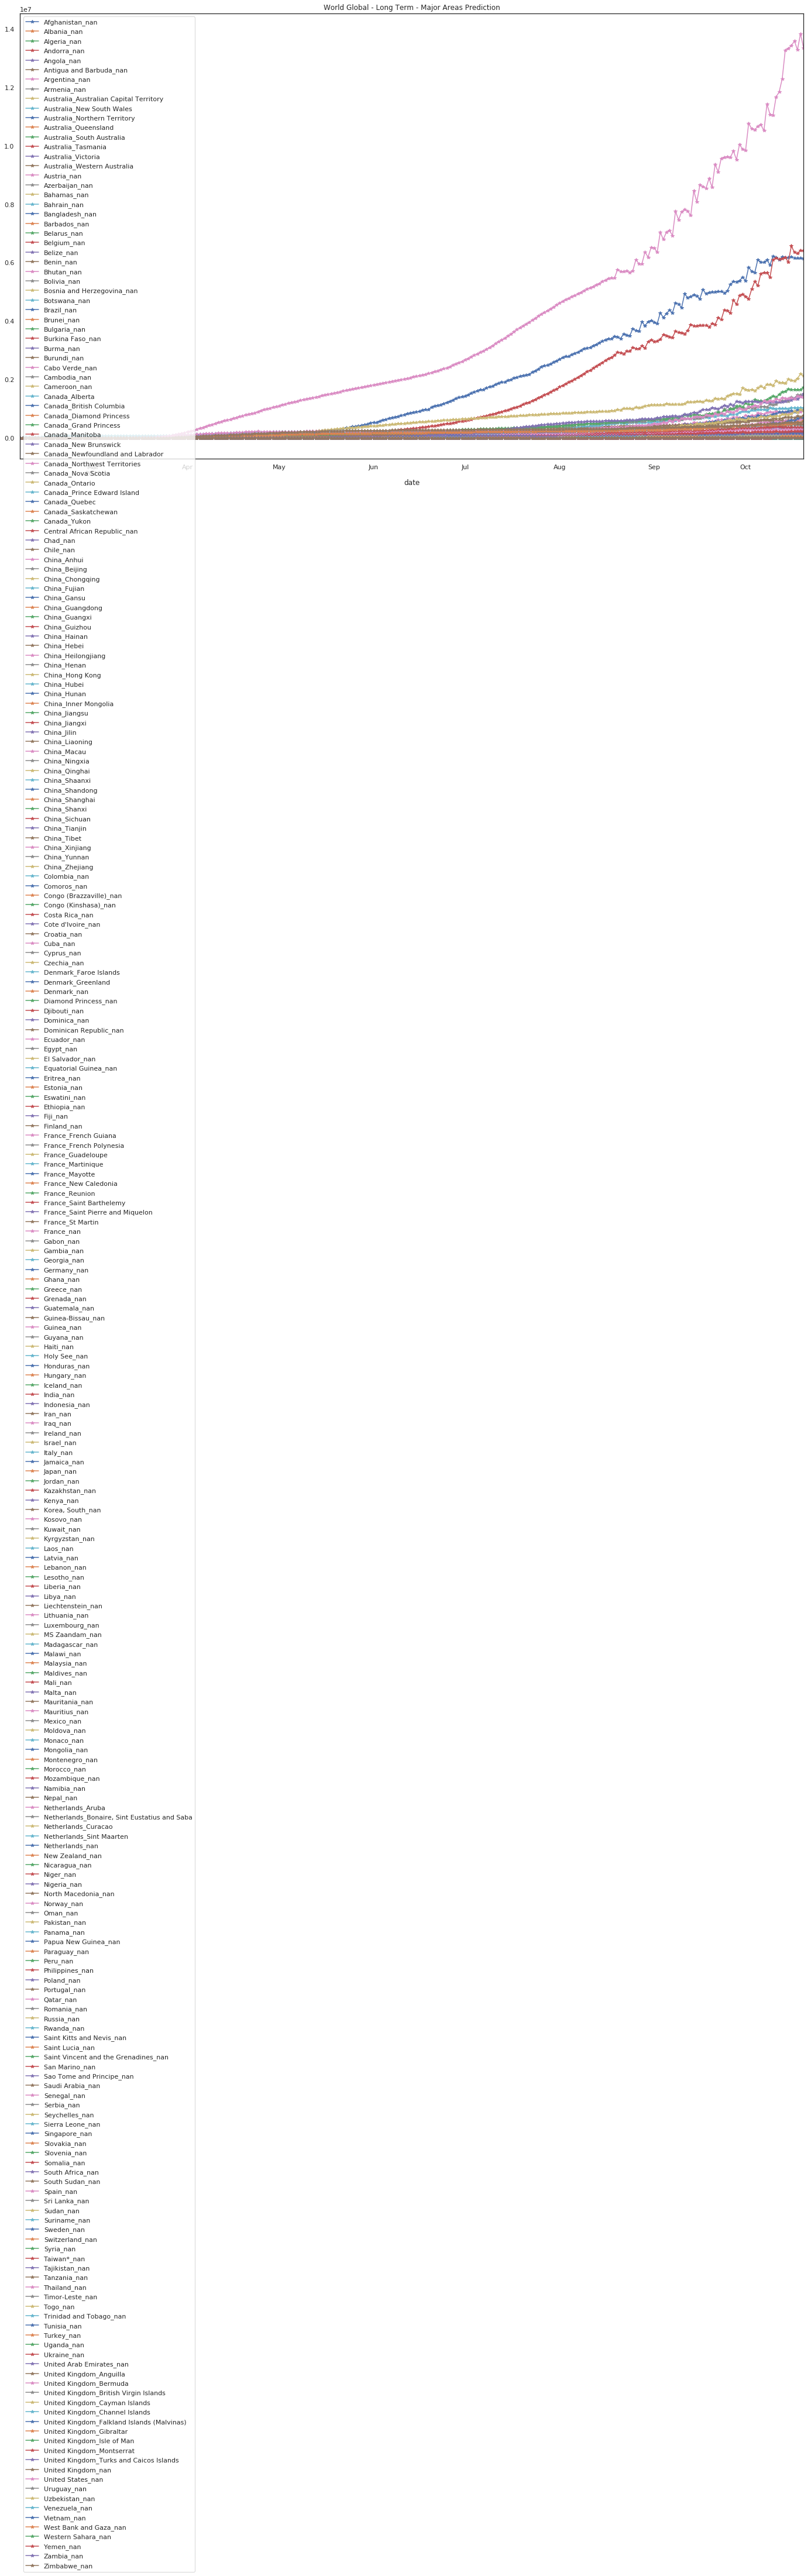

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             51.0         85.0        177.0        174.0   
2020-03-23             78.0         99.0        269.0        232.0   
2020-03-24             55.0        112.0        287.0        211.0   
2020-03-25            113.0        131.0        333.0        189.0   
2020-03-26            125.0        156.0        369.0        213.0   
2020-03-27            133.0        199.0        464.0        250.0   
2020-03-28            169.0        211.0        508.0        300.0   
2020-03-29            162.0        224.0        542.0        355.0   
2020-03-30            146.0        247.0        594.0        373.0   
2020-03-31            244.0        250.0        640.0        439.0   
2020-04-01            186.0        273.0        798.0        432.0   
2020-04-02            286.0        283.0        933.0        434.0   
2020-04-03            345.0        291.0       1050.0        496.0   
2020-04-04            334.0        322.0       1347.0        477.0   
2020-04-05            354.0        355.0       1427.0        496.0   
2020-04-06            443.0        391.0       1496.0        545.0   
2020-04-07            414.0        415.0       1681.0        560.0   
2020-04-08            510.0        413.0       1652.0        586.0   
2020-04-09            503.0        442.0       1762.0        612.0   
2020-04-10            546.0        448.0       1841.0        627.0   
2020-04-11            599.0        442.0       1911.0        659.0   
2020-04-12            622.0        460.0       1956.0        627.0   
2020-04-13            673.0        461.0       2075.0        690.0   
2020-04-14            746.0        490.0       2123.0        683.0   
2020-04-15            772.0        490.0       2221.0        691.0   
2020-04-16            869.0        508.0       2296.0        719.0   
2020-04-17            920.0        540.0       2377.0        697.0   
2020-04-18           1019.0        568.0       2561.0        735.0   
2020-04-19           1021.0        570.0       2689.0        742.0   
2020-04-20           1118.0        584.0       2787.0        743.0   
...                     ...          ...          ...          ...   
2020-09-21          49715.0      16760.0      65882.0       1432.0   
2020-09-22          49388.0      17762.0      63163.0       1545.0   
2020-09-23          51884.0      17645.0      67172.0       1517.0   
2020-09-24          51517.0      18586.0      65400.0       1540.0   
2020-09-25          51667.0      18249.0      71521.0       1555.0   
2020-09-26          55597.0      20546.0      69173.0       1555.0   
2020-09-27          54871.0      20476.0      72856.0       1541.0   
2020-09-28          54898.0      20781.0      78506.0       1591.0   
2020-09-29          55608.0      20172.0      77412.0       1562.0   
2020-09-30          55149.0      21760.0      77556.0       1529.0   
2020-10-01          55090.0      22936.0      76952.0       1640.0   
2020-10-02          54867.0      22482.0      79350.0       1622.0   
2020-10-03          54070.0      22766.0      83165.0       1622.0   
2020-10-04          54175.0      22184.0      80082.0       1639.0   
2020-10-05          54061.0      24821.0      88707.0       1630.0   
2020-10-06          55501.0      25308.0      87554.0       1618.0   
2020-10-07          55048.0      24417.0      86343.0       1656.0   
2020-10-08          56931.0      26383.0      91870.0       1632.0   
2020-10-09          56803.0      25408.0      90393.0       1619.0   
2020-10-10          56774.0      28201.0      87995.0       1665.0   
2020-10-11          57242.0      26927.0      92218.0       1658.0   
2020-10-12          56378.0      29440.0      94345.0       1646.0   
2020-10-13          57794.0      29610.0      92615.0       1666.0   
2020-10-14          59753.0      31523.0     102018.0       1721.0   
2020-10-15

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
238                                Thailand_nan  15.870032  100.992541   
239                             Timor-Leste_nan  -8.874217  125.727539   
240                                    Togo_nan   8.619500    0.824800   
241                     Trinidad and Tobago_nan  10.691800  -61.222500   
242                                 Tunisia_nan  33.886917    9.537499   
243                                  Turkey_nan  38.963700   35.243300   
244                           United States_nan  40.000000 -100.000000   
245                                  Uganda_nan   1.373333   32.290275   
246                                 Ukraine_nan  48.379400   31.165600   
247                    United Arab Emirates_nan  23.424076   53.847818   
248                     United Kingdom_Anguilla  18.220600  -63.068600   
249                      United Kingdom_Bermuda  32.307800  -64.750500   
250       United Kingdom_British Virgin Islands  18.420700  -64.640000   
251               United Kingdom_Cayman Islands  19.313300  -81.254600   
252              United Kingdom_Channel Islands  49.372300   -2.364400   
253  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
254                    United Kingdom_Gibraltar  36.140800   -5.353600   
255                  United Kingdom_Isle of Man  54.236100   -4.548100   
256                   United Kingdom_Montserrat  16.742498  -62.187366   
257     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
258                          United Kingdom_nan  55.378100   -3.436000   
259                                 Uruguay_nan -32.522800  -55.765800   
260                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:50]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1       7               Armenia_nan  40.069100   45.038200   
2      19               Bahrain_nan  26.027500   50.550000   
3      20            Bangladesh_nan  23.685000   90.356300   
4      22               Belarus_nan  53.709800   27.953400   
5      23               Belgium_nan  50.833300    4.469936   
6      27               Bolivia_nan -16.290200  -63.588700   
7      30                Brazil_nan -14.235000  -51.925300   
8      50             Canada_Quebec  52.939900  -73.549100   
9      55                 Chile_nan -35.675100  -71.543000   
10     69               China_Hubei  30.975600  112.270700   
11     89              Colombia_nan   4.570900  -74.297300   
12    105    Dominican Republic_nan  18.735700  -70.162700   
13    106               Ecuador_nan  -1.831200  -78.183400   
14    107                 Egypt_nan  26.820553   30.802498   
15    113              Ethiopia_nan   9.145000   40.489700   
16    126                France_nan  46.227600    2.213700   
17    131               Germany_nan  51.165691   10.451526   
18    135             Guatemala_nan  15.783500  -90.230800   
19    141              Honduras_nan  15.200000  -86.241900   
20    144                 India_nan  20.593684   78.962880   
21    145             Indonesia_nan  -0.789300  113.921300   
22    146                  Iran_nan  32.427908   53.688046   
23    147                  Iraq_nan  33.223191   43.679291   
24    149                Israel_nan  31.046051   34.851612   
25    150                 Italy_nan  41.871940   12.567380   
26    152                 Japan_nan  36.204824  138.252924   
27    154            Kazakhstan_nan  48.019600   66.923700   
28    158                Kuwait_nan  29.311660   47.481766   
29    179                Mexico_nan  23.634500 -102.552800   
30    199                  Oman_nan  21.512583   55.923255   
31    200              Pakistan_nan  30.375300   69.345100   
32    201                Panama_nan   8.538000  -80.782100   
33    204                  Peru_nan  -9.190000  -75.015200   
34    205           Philippines_nan  12.879721  121.774017   
35    206                Poland_nan  51.919400   19.145100   
36    207              Portugal_nan  39.399900   -8.224500   
37    208                 Qatar_nan  25.354800   51.183900   
38    209               Romania_nan  45.943200   24.966800   
39    210                Russia_nan  61.524010  105.318756   
40    217          Saudi Arabia_nan  23.885942   45.079162   
41    222             Singapore_nan   1.283300  103.833300   
42    226          South Africa_nan -30.559500   22.937500   
43    228                 Spain_nan  40.463667   -3.749220   
44    232                Sweden_nan  60.128161   18.643501   
45    243                Turkey_nan  38.963700   35.243300   
46    244         United States_nan  40.000000 -100.000000   
47    246               Ukraine_nan  48.379400   31.165600   
48    247  United Arab Emirates_nan  23.424076   53.847818   
49    258        United Kingdom_nan  55.378100   -3.436000   

    2020-02-06 00:00:00  2020-02-07 00:00:00  2020-02-08 00:00:00  \
0                  13.0                 13.0                 13.0   
1                  13.0                 13.0                 13.0   
2                  13.0                 13.0                 13.0   
3                  13.0                 13.0                 13.0   
4                  13.0                 13.0                 13.0   
5                  28.0                 33.0                 19.0   
6                  13.0                 13.0                 13.0   
7                  13.0                 13.0                 13.0   
8                  13.0                 13.0                 13.0   
9                  13.0                 13.0                 13.0   
10             -13879.0              22112.0              24953.0   
11           

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()